## Imports

In [193]:
# Oui c'est pas bien de faire ca, 
# mais au moins on peut utiliser les objets comme dans la notice

from music21 import *

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
import random

## Chapter 2 : Notes

In [84]:
note

<module 'music21.note' from '/Users/WDescamps/.pyenv/versions/3.10.10/envs/human/lib/python3.10/site-packages/music21/note.py'>

In [85]:
#dir(note)

In [86]:
f = note.Note("F5")

#### What's a note anyway?

In [87]:
f

<music21.note.Note F>

In [88]:
f.name

'F'

In [89]:
f.octave

5

In [90]:
f.pitch.frequency

698.456462866008

In [91]:
f.pitch.pitchClassString

'5'

In [55]:
f.octave == 5

True

In [56]:
f.pitch.pitchClassString == 5

False

In [57]:
f.pitch.pitchClassString == "5"

True

In [58]:
f.pitch.pitchClass

5

#### Sharps and flats

In [59]:
bflat = note.Note("B-2")

In [60]:
bflat.pitch.accidental

<music21.pitch.Accidental flat>

In [61]:
bflatacc = bflat.pitch.accidental

In [62]:
bflatacc.alter

-1.0

In [63]:
bflat.pitch.accidental.alter

-1.0

In [64]:
bflatacc.displayLocation

'normal'

In [65]:
bflatacc.displayLocation = 'above'

In [66]:
If you set the value of that weird attribute, you can use it later:

SyntaxError: invalid syntax (1186549779.py, line 1)

In [67]:
bflat.wasWrittenByStockhausen = True

if bflat.wasWrittenByStockhausen == True:
    print("Hope you're enjoying Sirius!")

Hope you're enjoying Sirius!


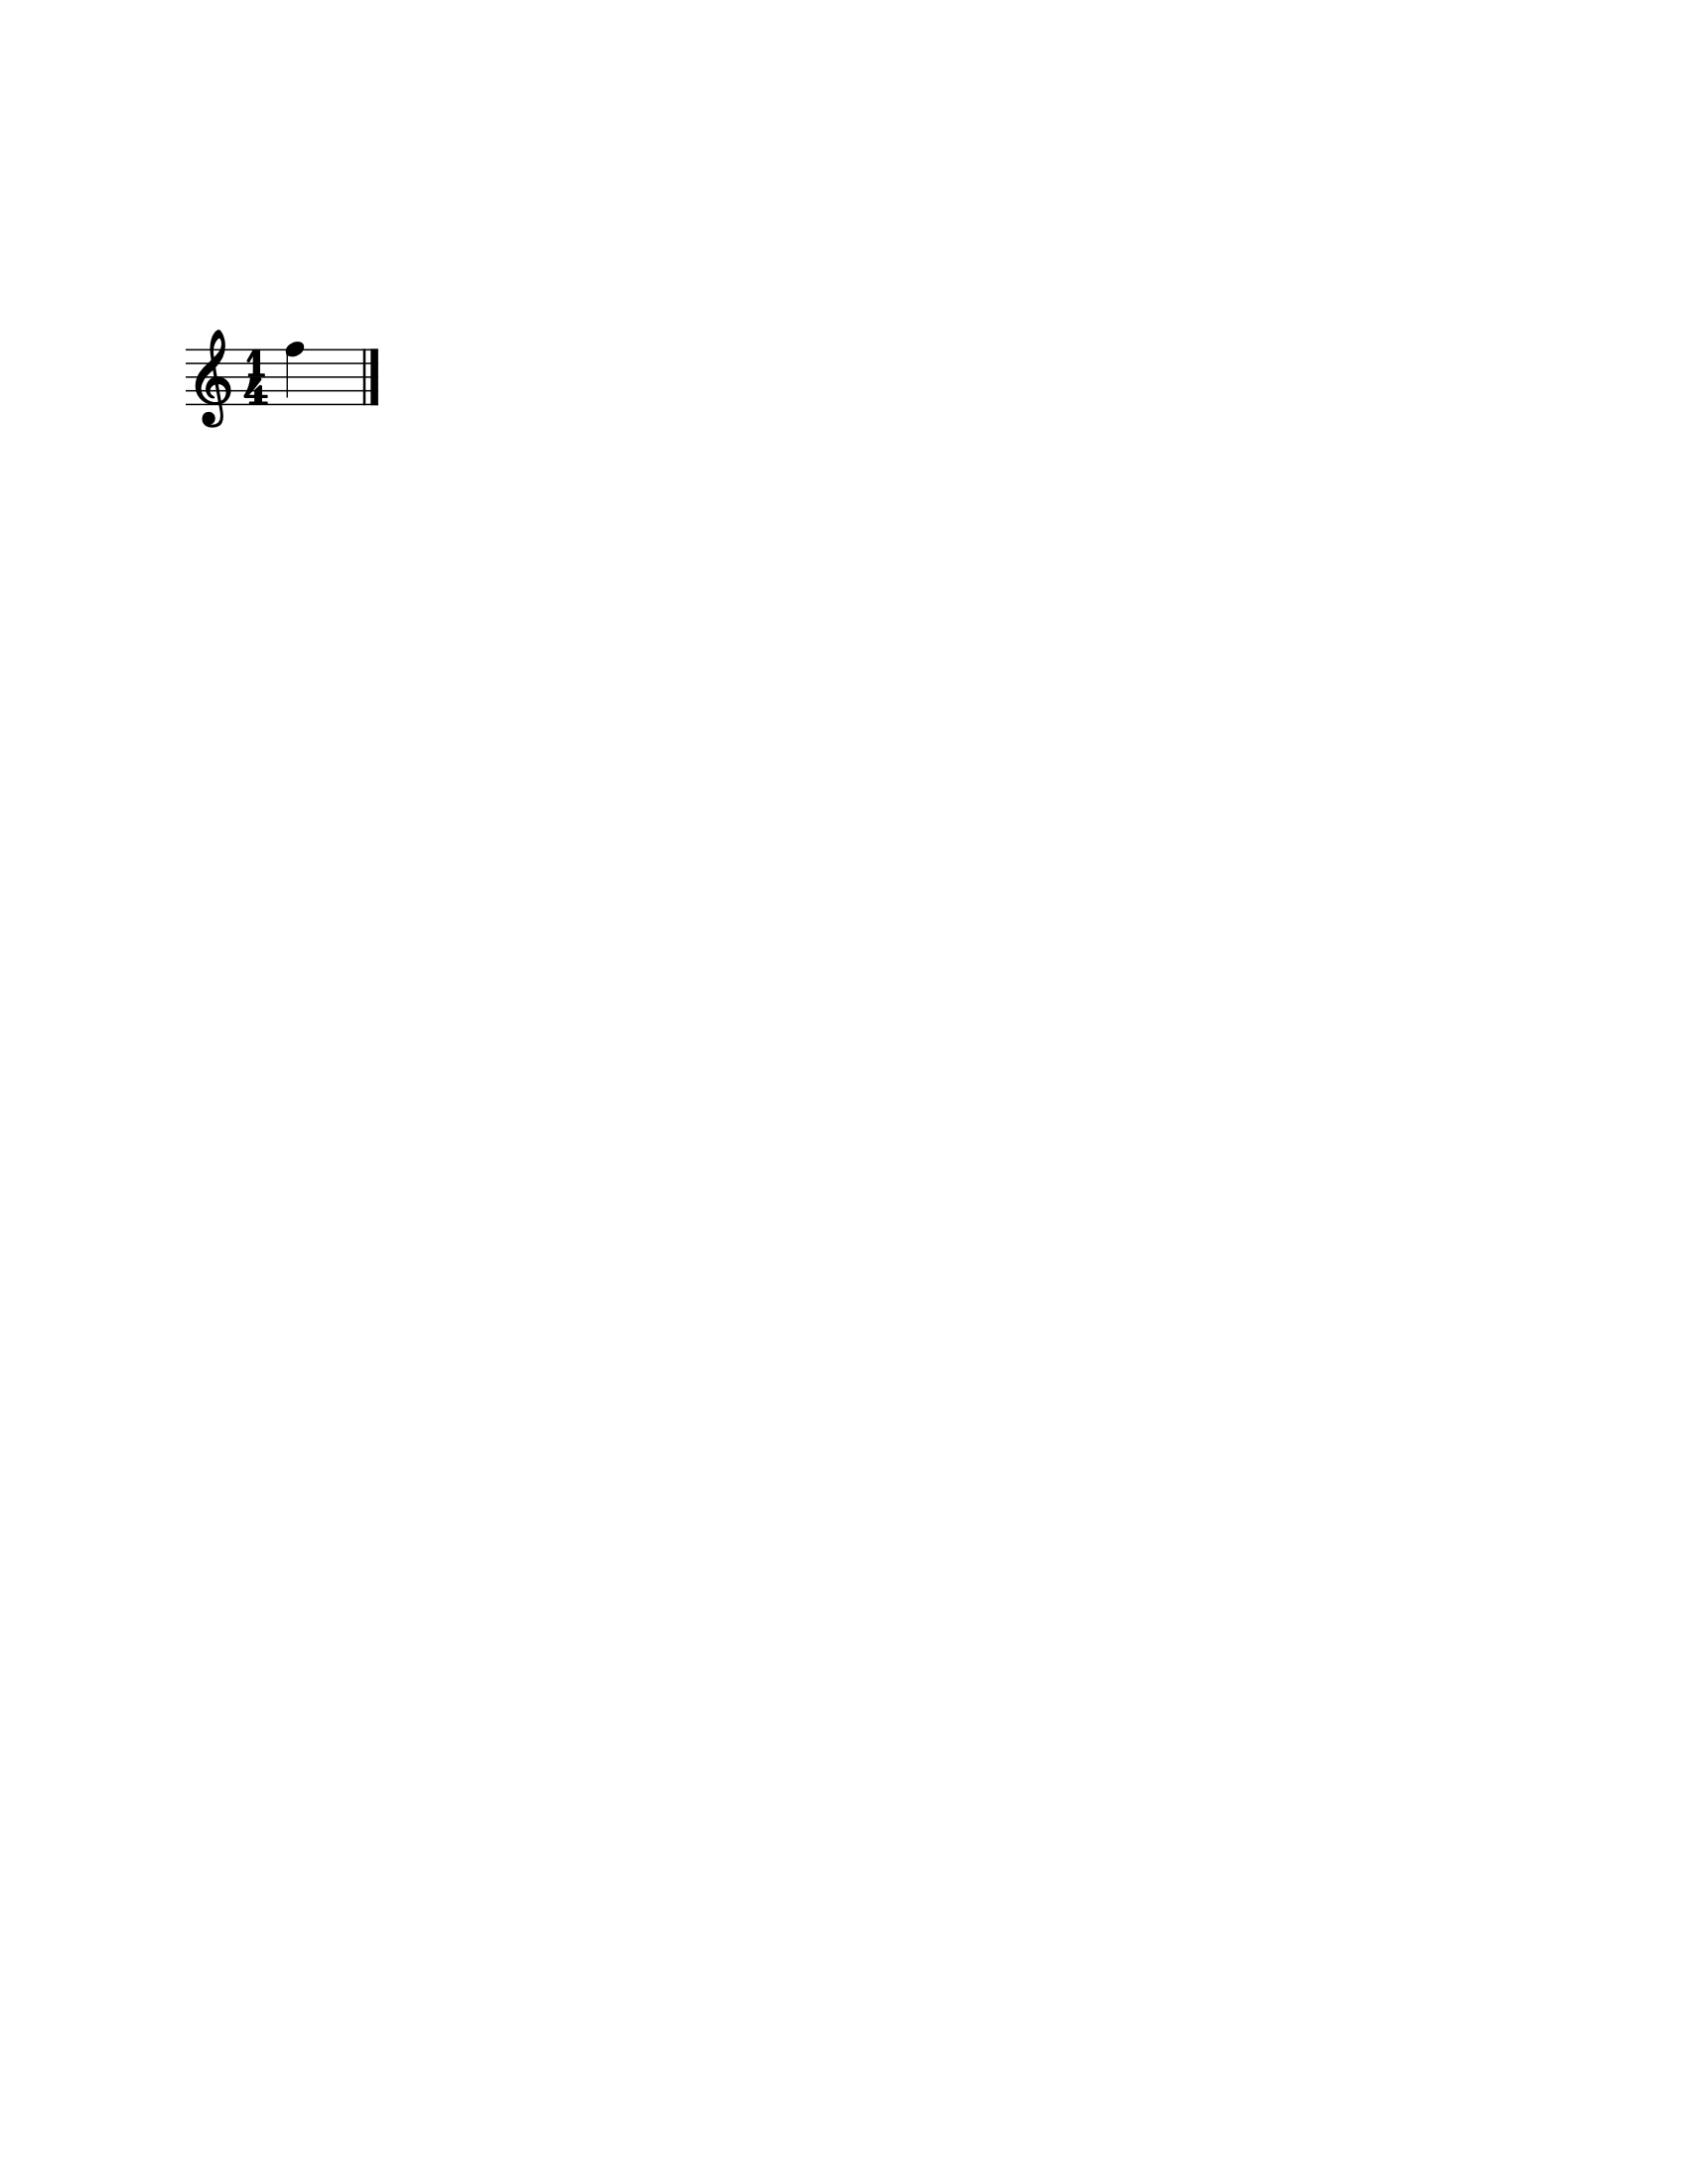

In [92]:
f.show()

In [70]:
f.show('midi')

In [93]:
note_stream = stream.Stream()

In [94]:
note_stream.append(f)

In [96]:
StreamPlayer(note_stream).play()

In [97]:
d = bflat.transpose("M3")
d

<music21.note.Note G>

In [98]:
note_stream.append(d)

In [99]:
# Let's play it
StreamPlayer(note_stream).play()

In [100]:
bflat.transpose("P4", inPlace=True)
note_stream.append(bflat)

In [101]:
note_stream.show("text")

{0.0} <music21.note.Note F>
{1.0} <music21.note.Note G>
{2.0} <music21.note.Note A->


In [102]:
# Let's play it
StreamPlayer(note_stream).play()

In [79]:
print(d.pitch.accidental)

None


In [103]:
r = note.Rest()

In [104]:
note_stream.append(r)

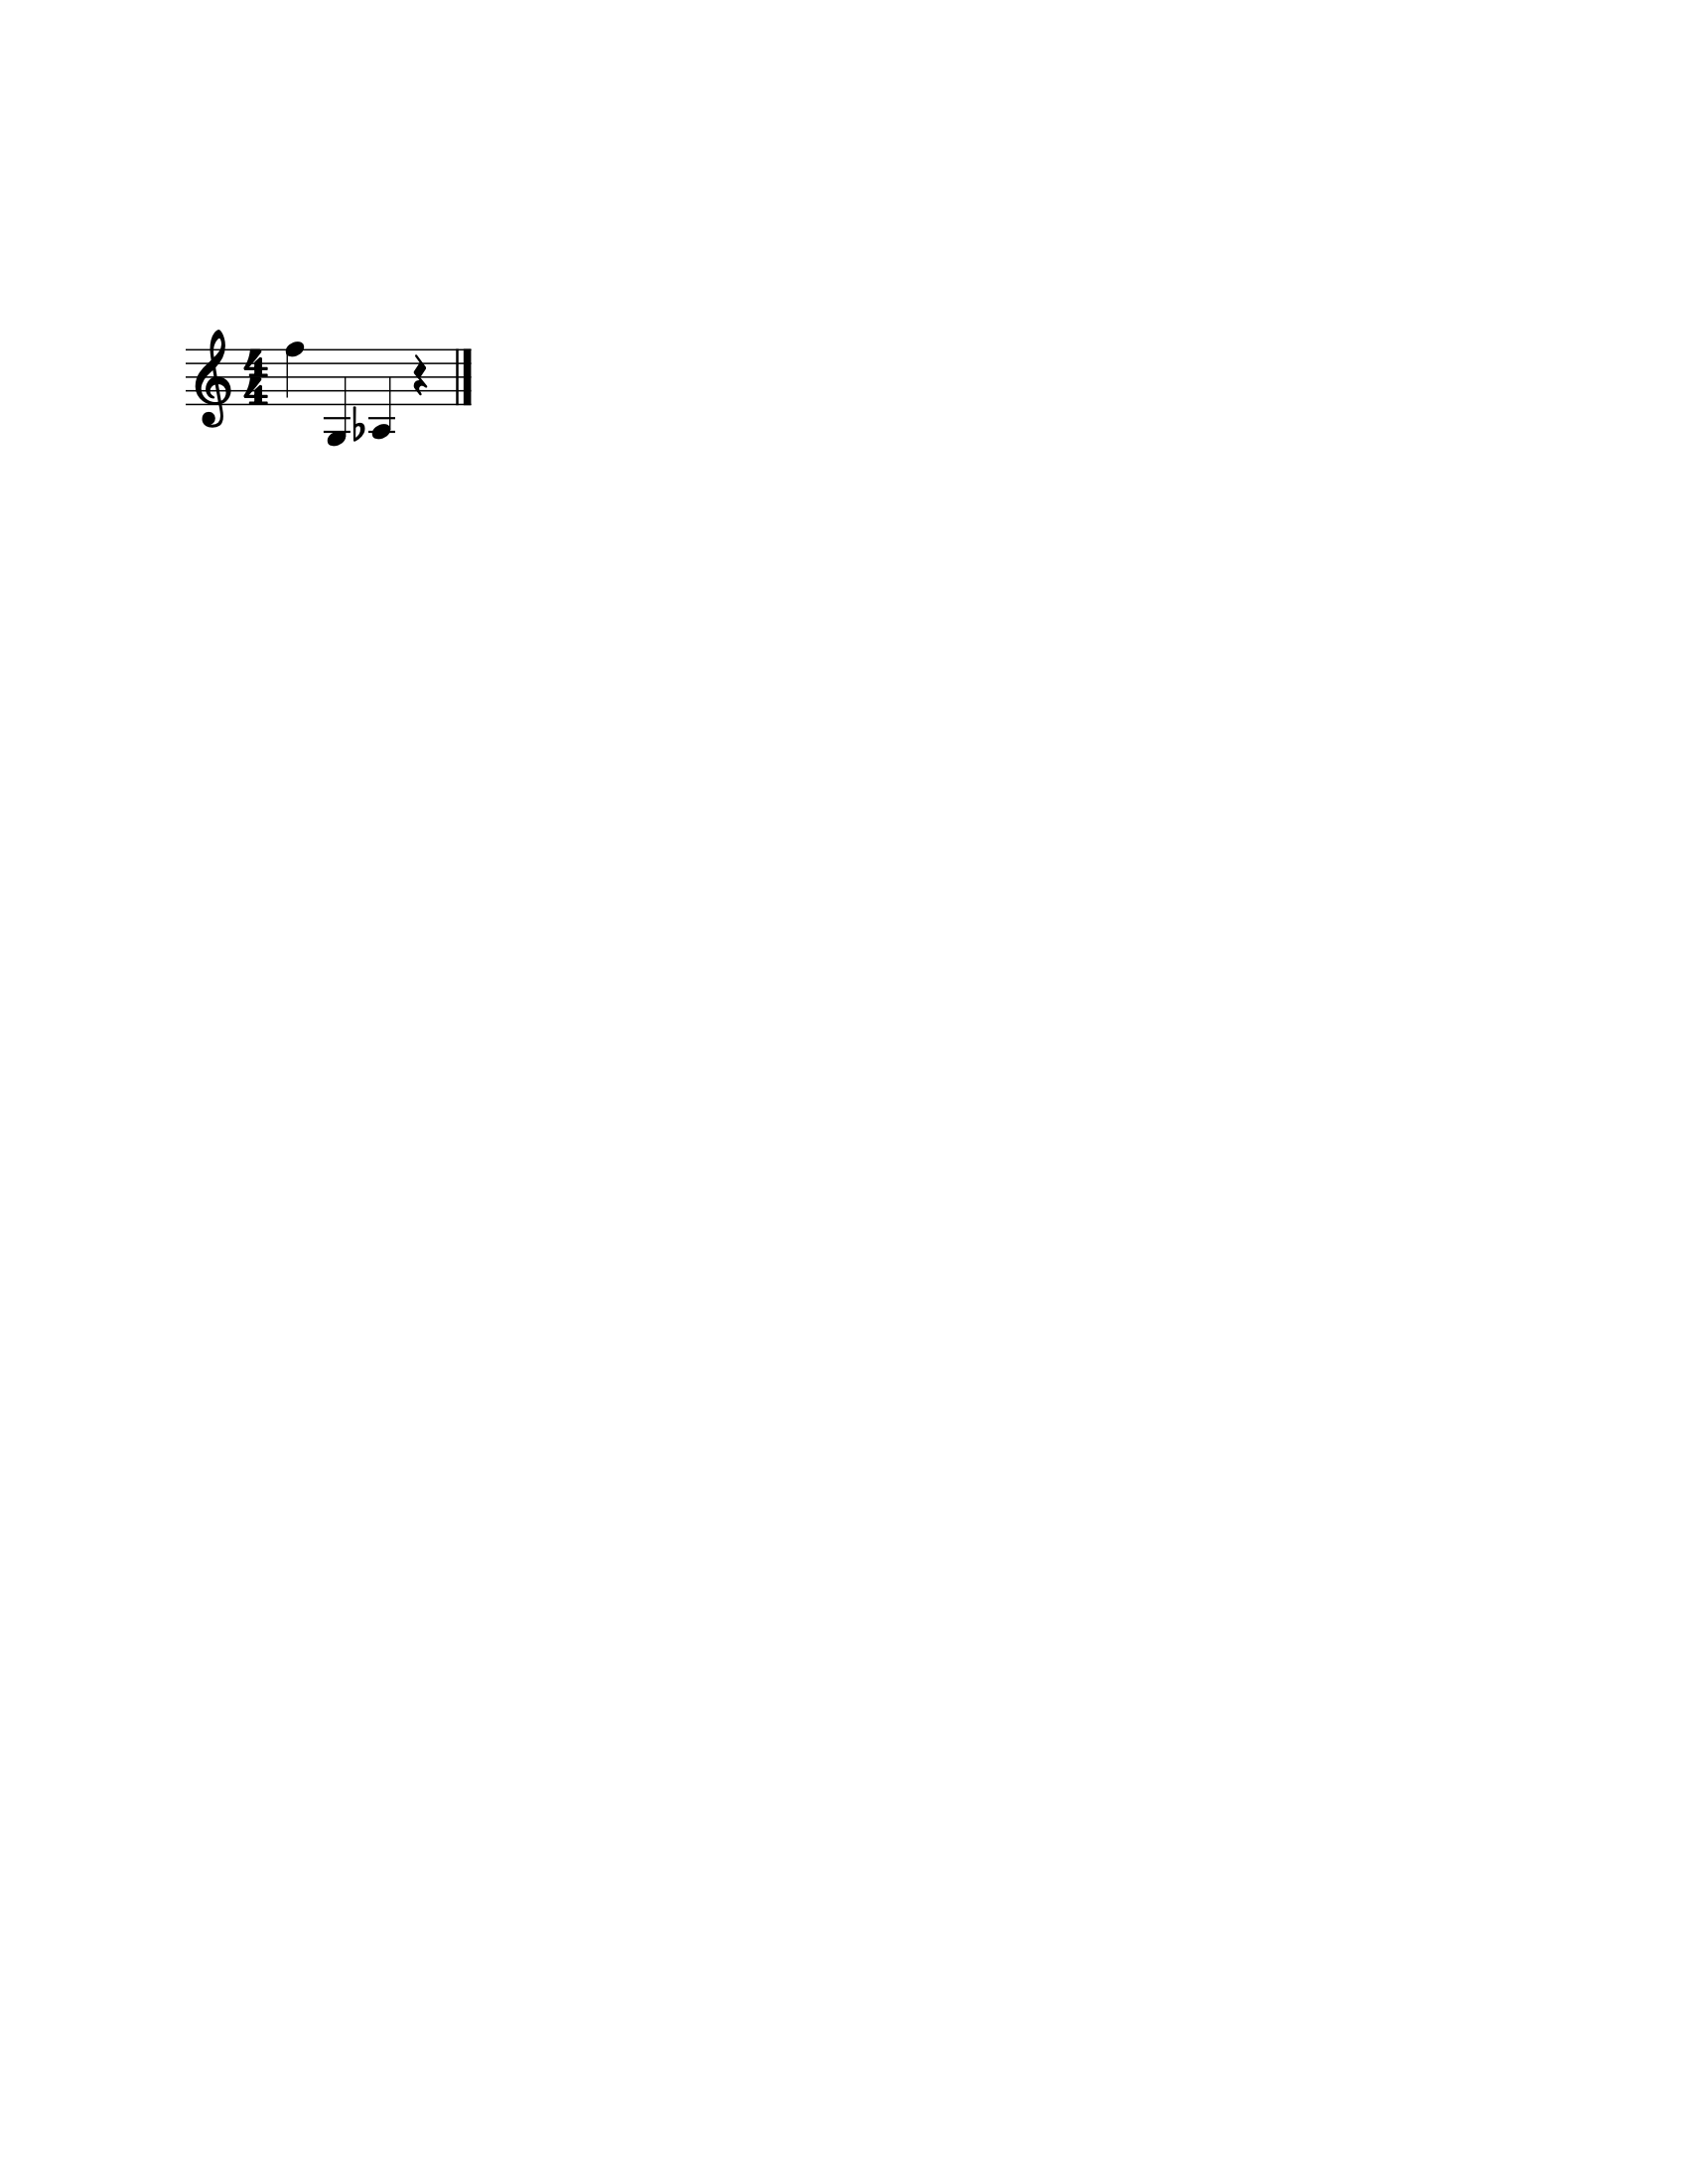

In [105]:
note_stream.show()

## Chapter 3 : Pitches, Durations and Notes again

### Pitches

In [83]:
p1 = pitch.Pitch('b-4')

In [106]:
p1

<music21.pitch.Pitch B-4>

In [113]:
# why 10?
p1.pitchClass

10

In [114]:
# # gives the value of the Pitch in the older, “MIDI” representation that is still in use today. It’s a number between 0 and 127 where middle C (C4) is 60 and C#4/Db4 is 61, B3 is 59, etc.
p1.midi

70

In [108]:
p1.name

'B-'

In [111]:
p1.nameWithOctave

'B-4'

In [109]:
p1.accidental.alter

-1.0

In [115]:
p1.name = 'd#'
p1.octave = 3
p1.nameWithOctave

'D#3'

In [ ]:
And our familiar .transpose() method also appears on Pitch as well. Remember that p1 is now a D#:

In [116]:
p2 = p1.transpose('M7')
p2

<music21.pitch.Pitch C##4>

In [119]:
#another way to show the variable p2 is 
repr(p2)

In [132]:
csharp = note.Note('C#4')
csharp.name

'C#'

In [121]:
csharp.pitch.name

'C#'

In [122]:
csharp.octave

4

In [123]:
csharp.pitch.octave

4

In [134]:
csharp.pitch.french

'do dièse'

In [127]:
#Notes don't
csharp.spanish

AttributeError: 'Note' object has no attribute 'spanish'

In [135]:
print(csharp.pitch.unicodeName)

C♯


In [130]:
print( csharp.pitch.getEnharmonic() )
print( csharp.pitch.getLowerEnharmonic() )

D-4
B##3


### Duration

In [137]:
halfDuration = duration.Duration('half')

In [138]:
dottedQuarter = duration.Duration(1.5)

In [143]:
dottedQuarter.quarterLength

1.5

In [140]:
halfDuration.quarterLength

2.0

In [144]:
halfDuration.type

'half'

In [145]:
dottedQuarter.type

'quarter'

In [146]:
dottedQuarter.dots

1

In [147]:
dottedQuarter.dots = 2
dottedQuarter.quarterLength

1.75

In [148]:
dottedQuarter.dots = 3
dottedQuarter.quarterLength

1.875

In [149]:
dottedQuarter.quarterLength = 0.25
dottedQuarter.type

'16th'

In [150]:
dottedQuarter.dots

0

### Back to notes

In [152]:
n1 = note.Note()
n1.pitch

<music21.pitch.Pitch C4>

In [153]:
n1.duration

<music21.duration.Duration 1.0>

In [154]:
#But we can play around with them:
n1.pitch.nameWithOctave = 'E-5'
n1.duration.quarterLength = 3.0

In [155]:
# and then the other properties change accordingly:

In [156]:
n1.duration.type

'half'

In [157]:
n1.duration.dots

1

In [159]:
n1.pitch.nameWithOctave

'E-5'

In [160]:
n1.pitch.accidental

<music21.pitch.Accidental flat>

In [161]:
n1.name

'E-'

In [162]:
n1.quarterLength

3.0

In [164]:
# Let’s change the quarterLength back to 1.0 for now:
n1.quarterLength = 1.0

In [169]:
otherNote = note.Note("F6")
otherNote.lyric = "Hello bitcheeeez!"

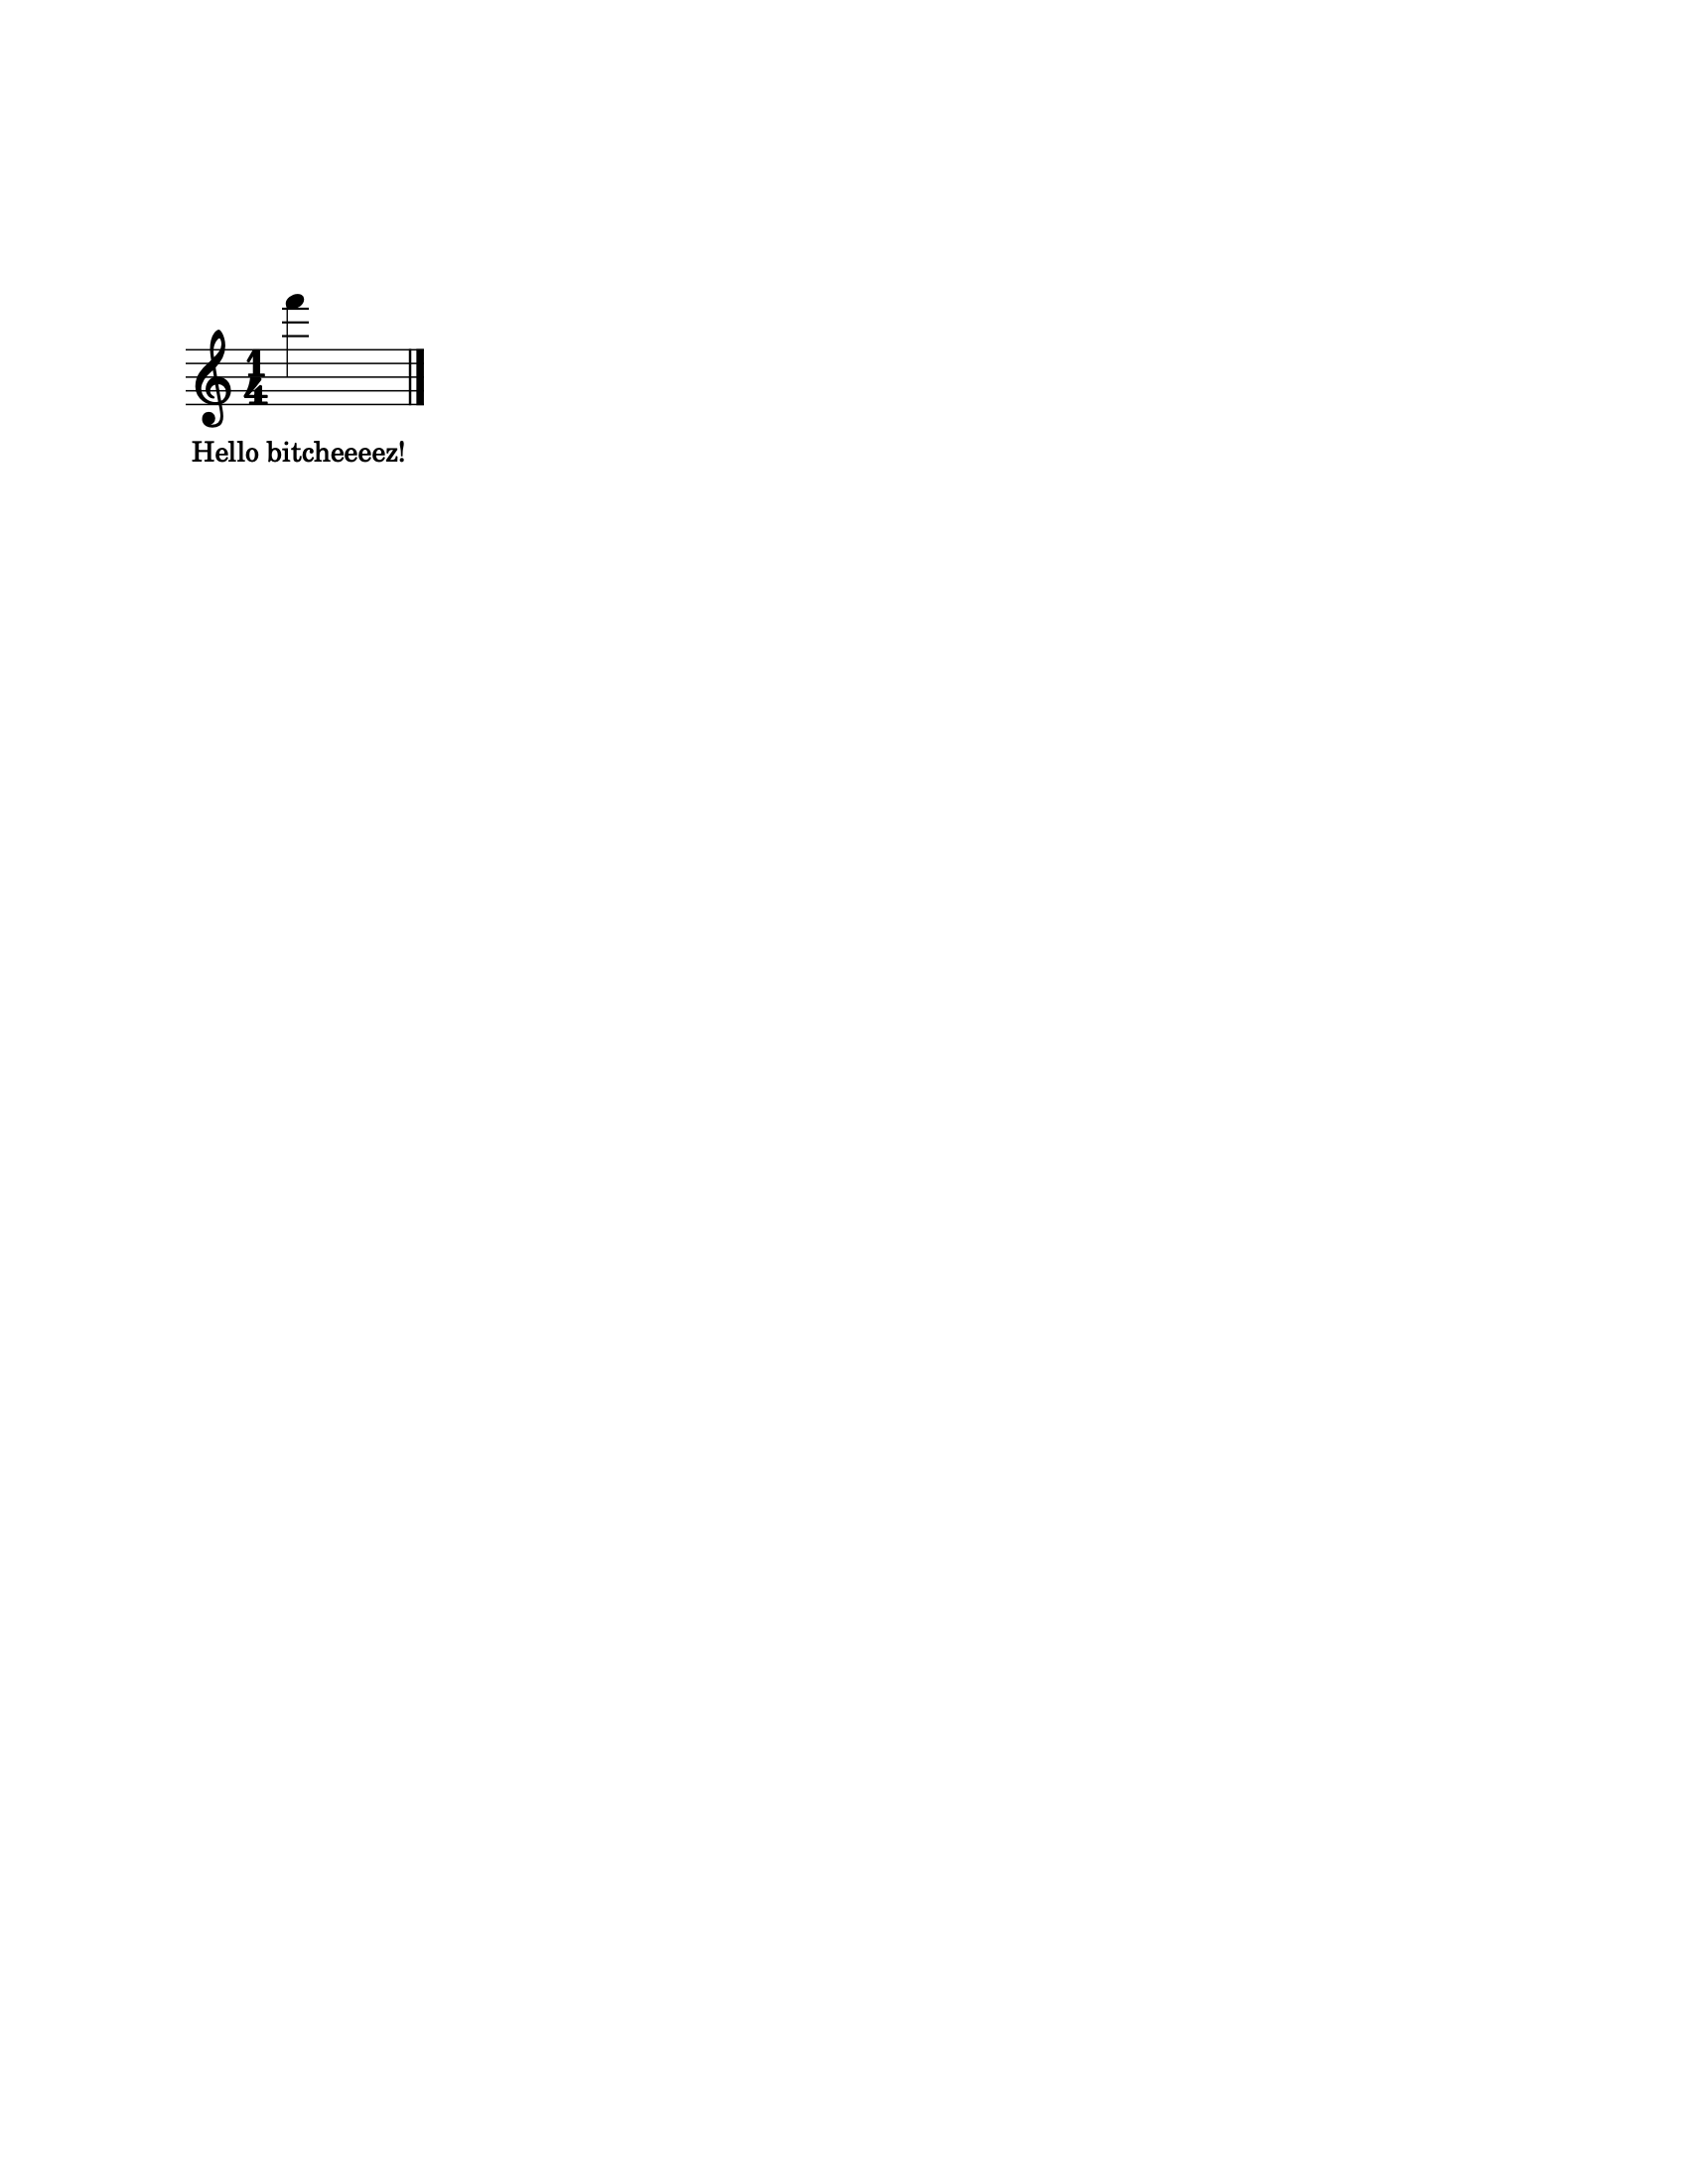

In [170]:
otherNote.show()

In [173]:
n1.addLyric(n1.nameWithOctave)
n1.addLyric(n1.pitch.pitchClassString)

In [175]:
#Finally, lets put the quarterLength of the note as a string with a preface “QL:”:
n1.addLyric(f'QL: {n1.quarterLength}')

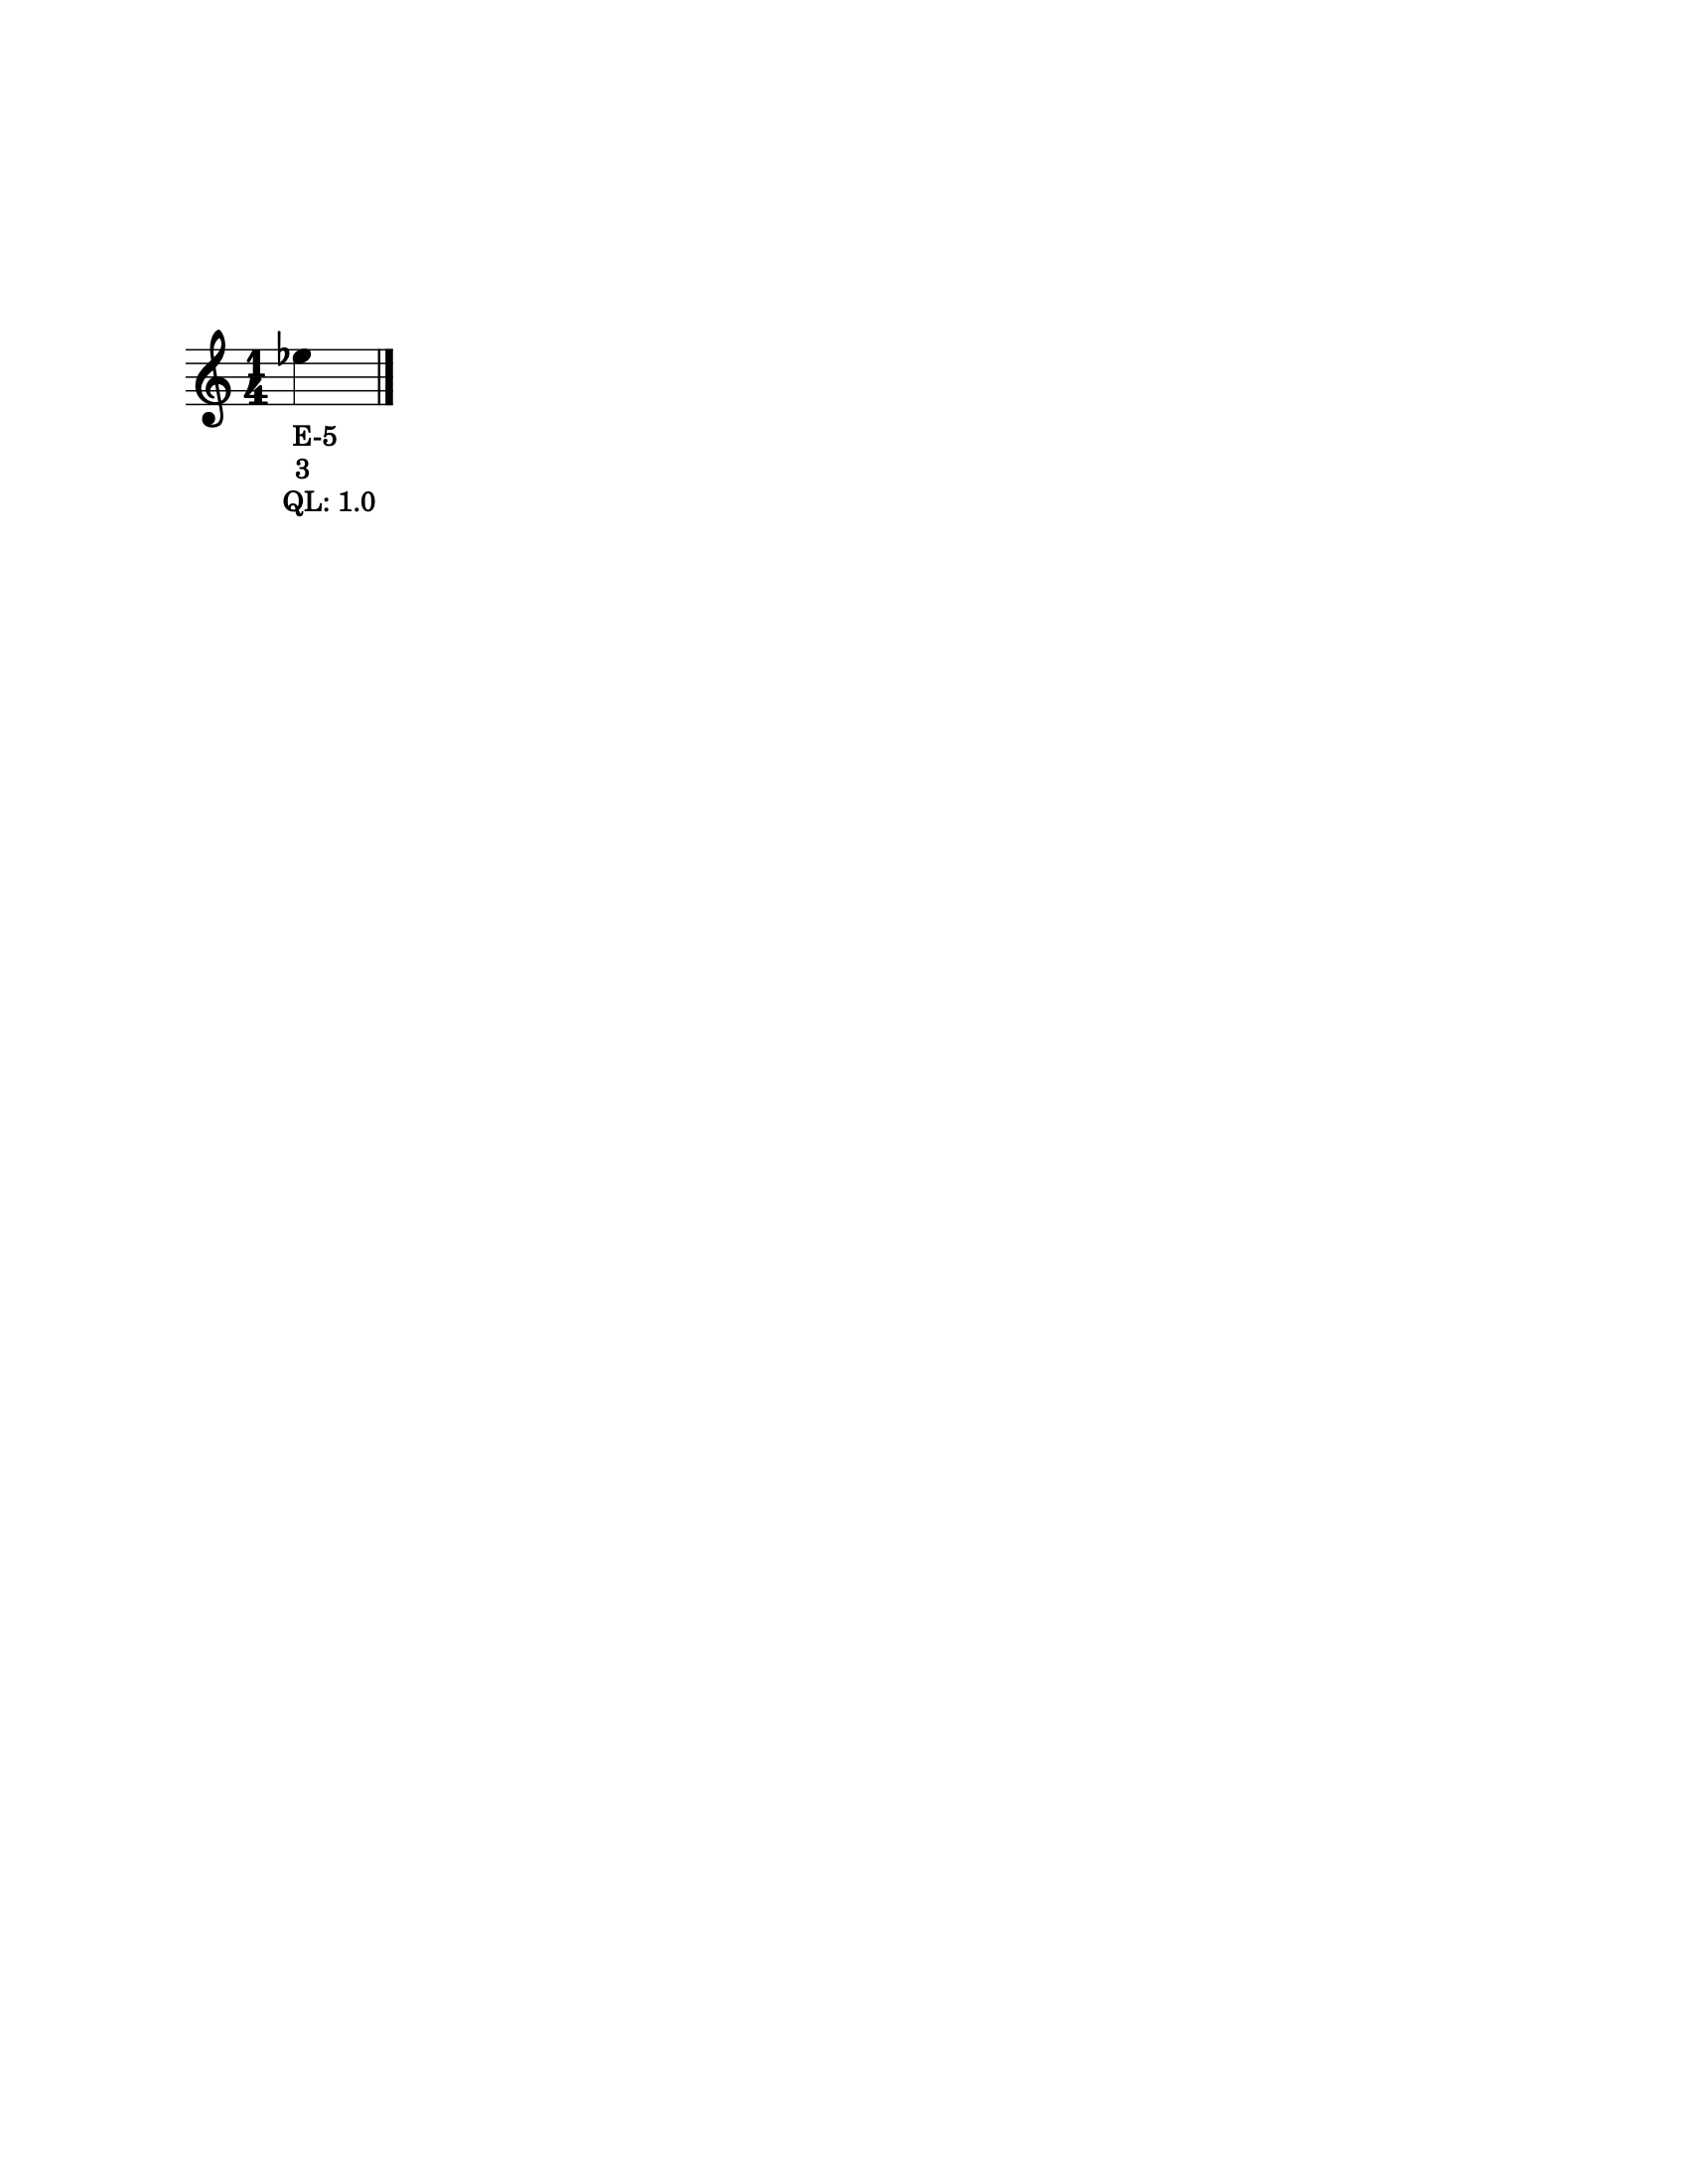

In [176]:
n1.show()

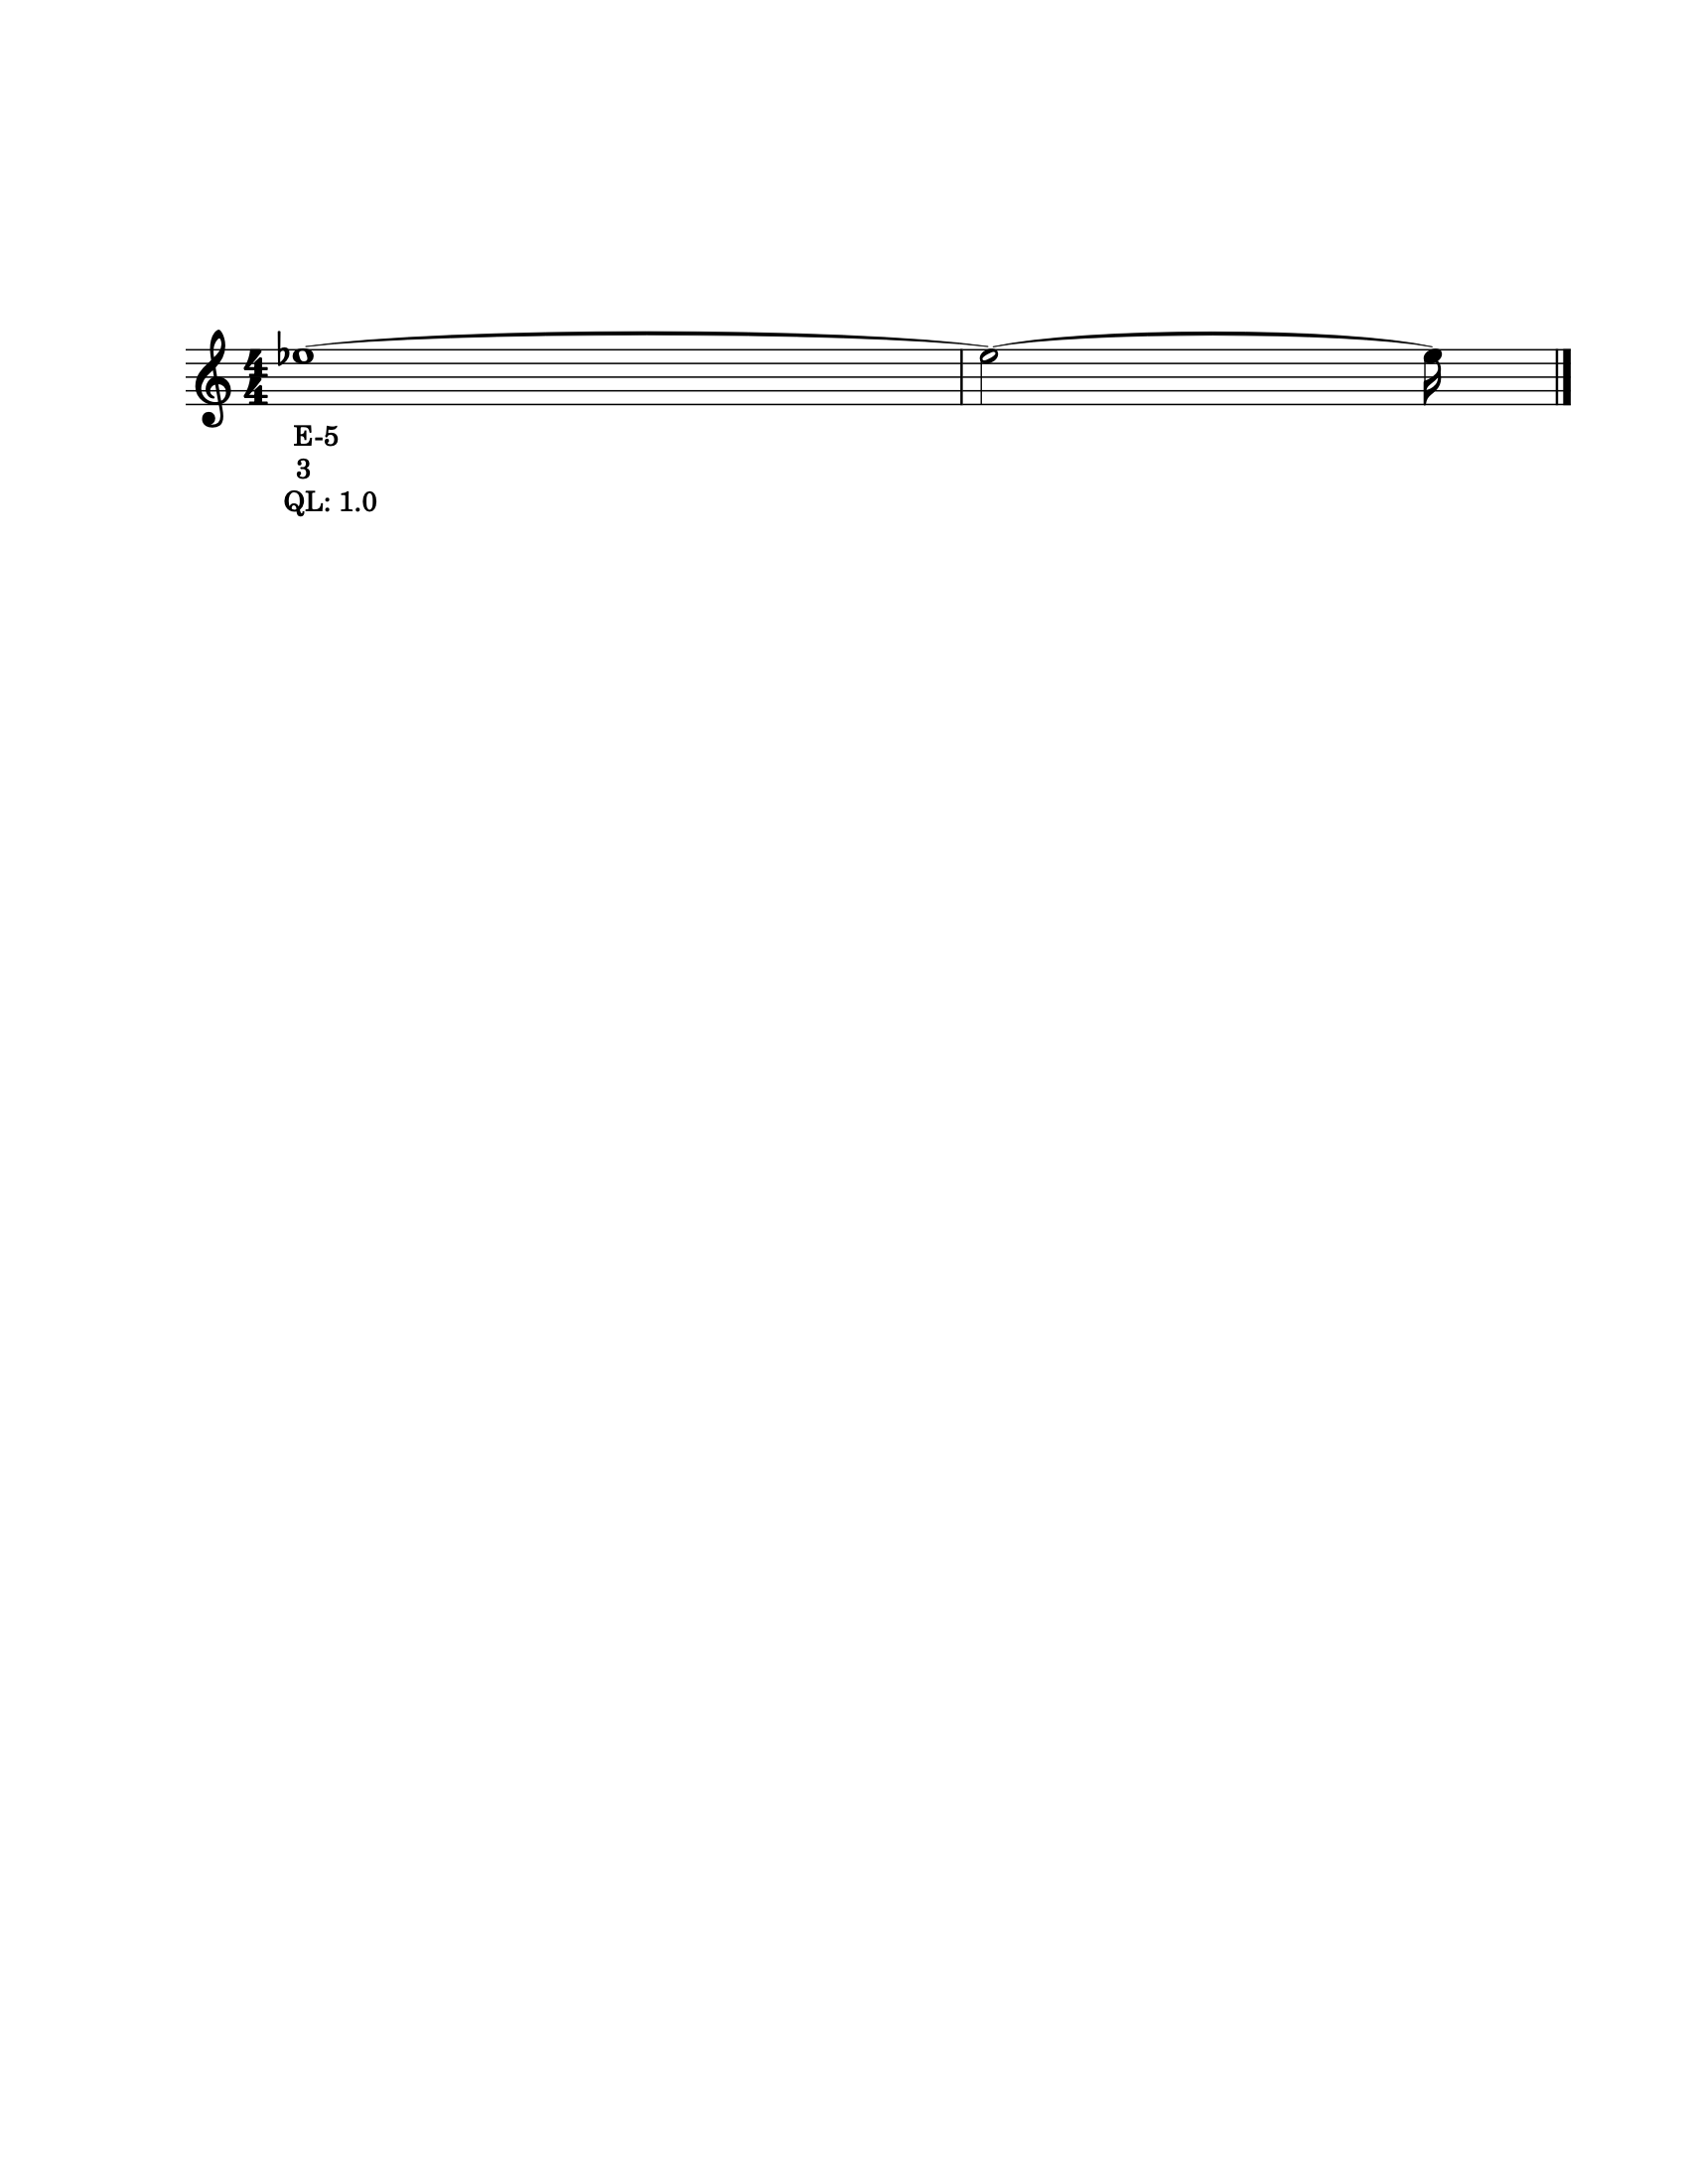

In [177]:
n1.quarterLength = 6.25
n1.show()

## Chapter 4 : Streams

### Working with multiple objects via Lists

In [180]:
note1 = note.Note("C4")
note2 = note.Note("F#4")

In [182]:
note1.duration.type = 'half'

In [183]:
note1.duration.quarterLength

2.0

In [186]:
note1.step

'C'

In [185]:
note2.step

'F'

In [187]:
noteList = [note1, note2]

In [188]:
noteList

[<music21.note.Note C>, <music21.note.Note F#>]

In [194]:
for i in noteList:
    print(i)

<music21.note.Note C>
<music21.note.Note F#>


In [195]:
note3 = note.Note("B-2")

In [197]:
noteList.append(note3)

In [198]:
len(noteList)

3

In [208]:
# fancy python list comprehension 
[i.name for i in noteList]

['C', 'F#', 'B-']

In [210]:
#All python methods are available
noteList[-1]

<music21.note.Note B->

### Streams

#### Creating simple streams

In [216]:
stream1 = stream.Stream()

In [217]:
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

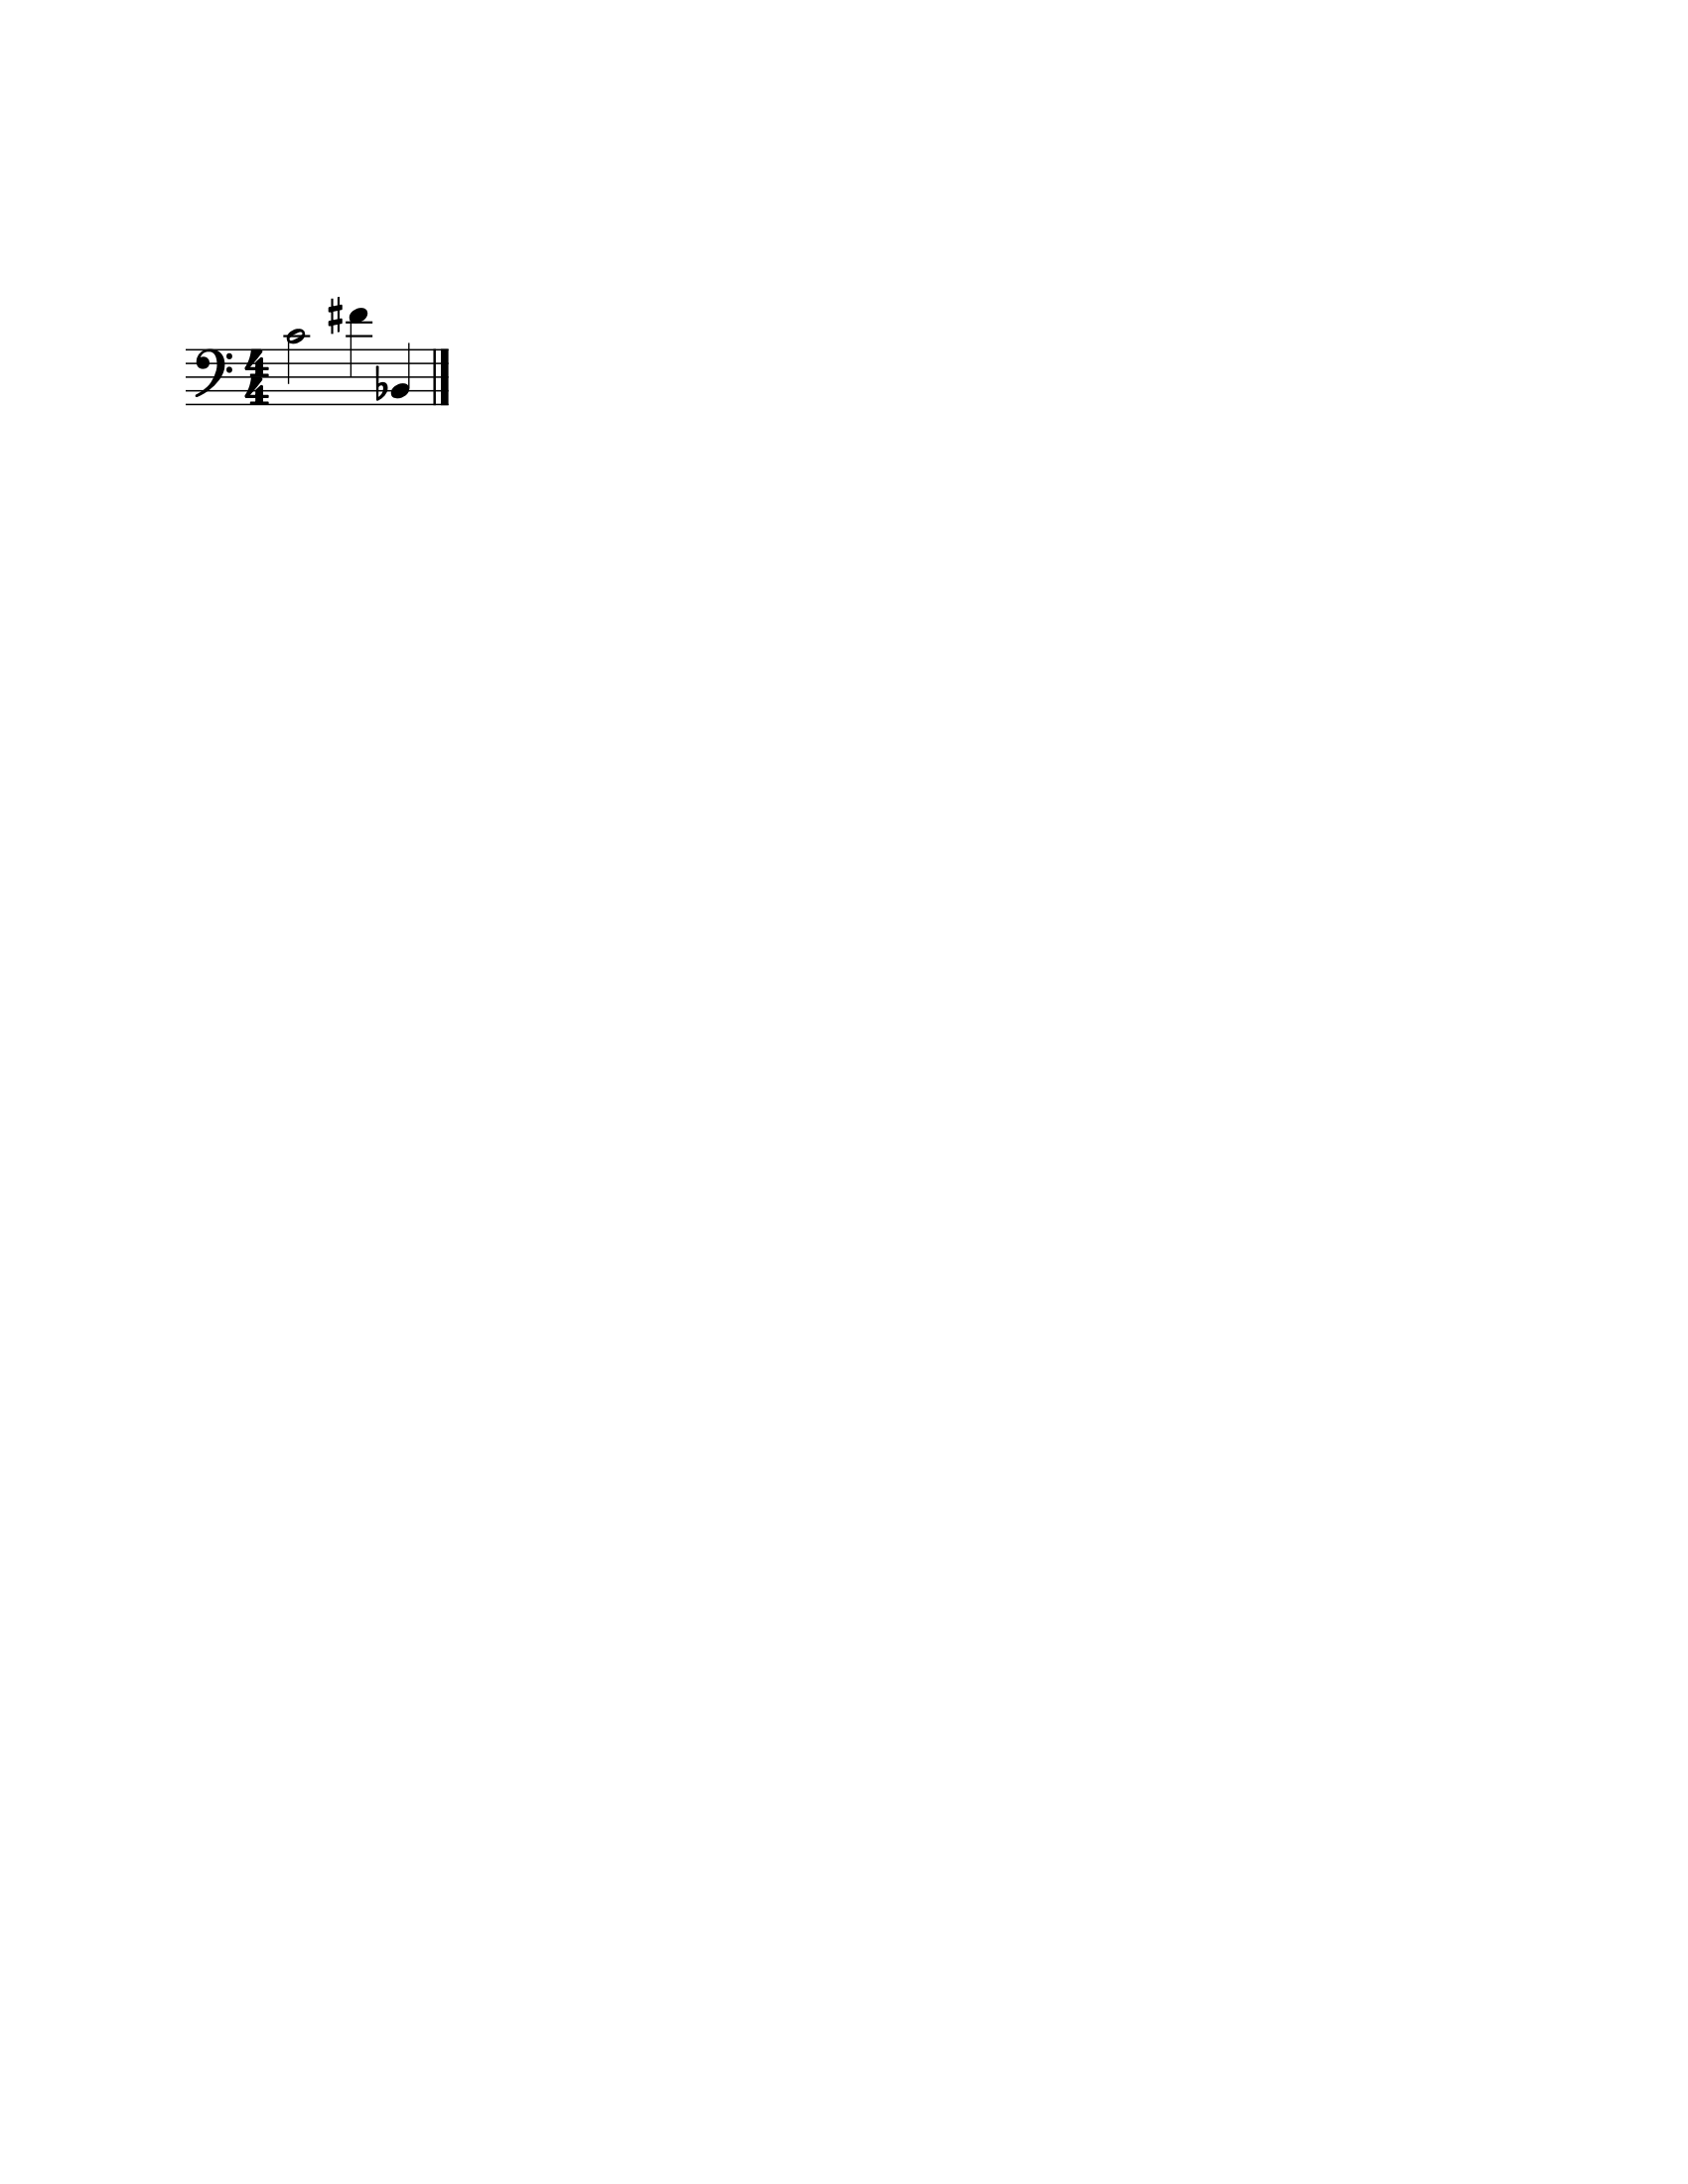

In [226]:
stream1.show()

Of course, this would be a pain to type for hundreds of Notes, so we could also use the Stream method repeatAppend() to add a number of independent, unique copies of the same Note. This creates independent copies (using Python’s copy.deepcopy function) of the supplied object, not references.

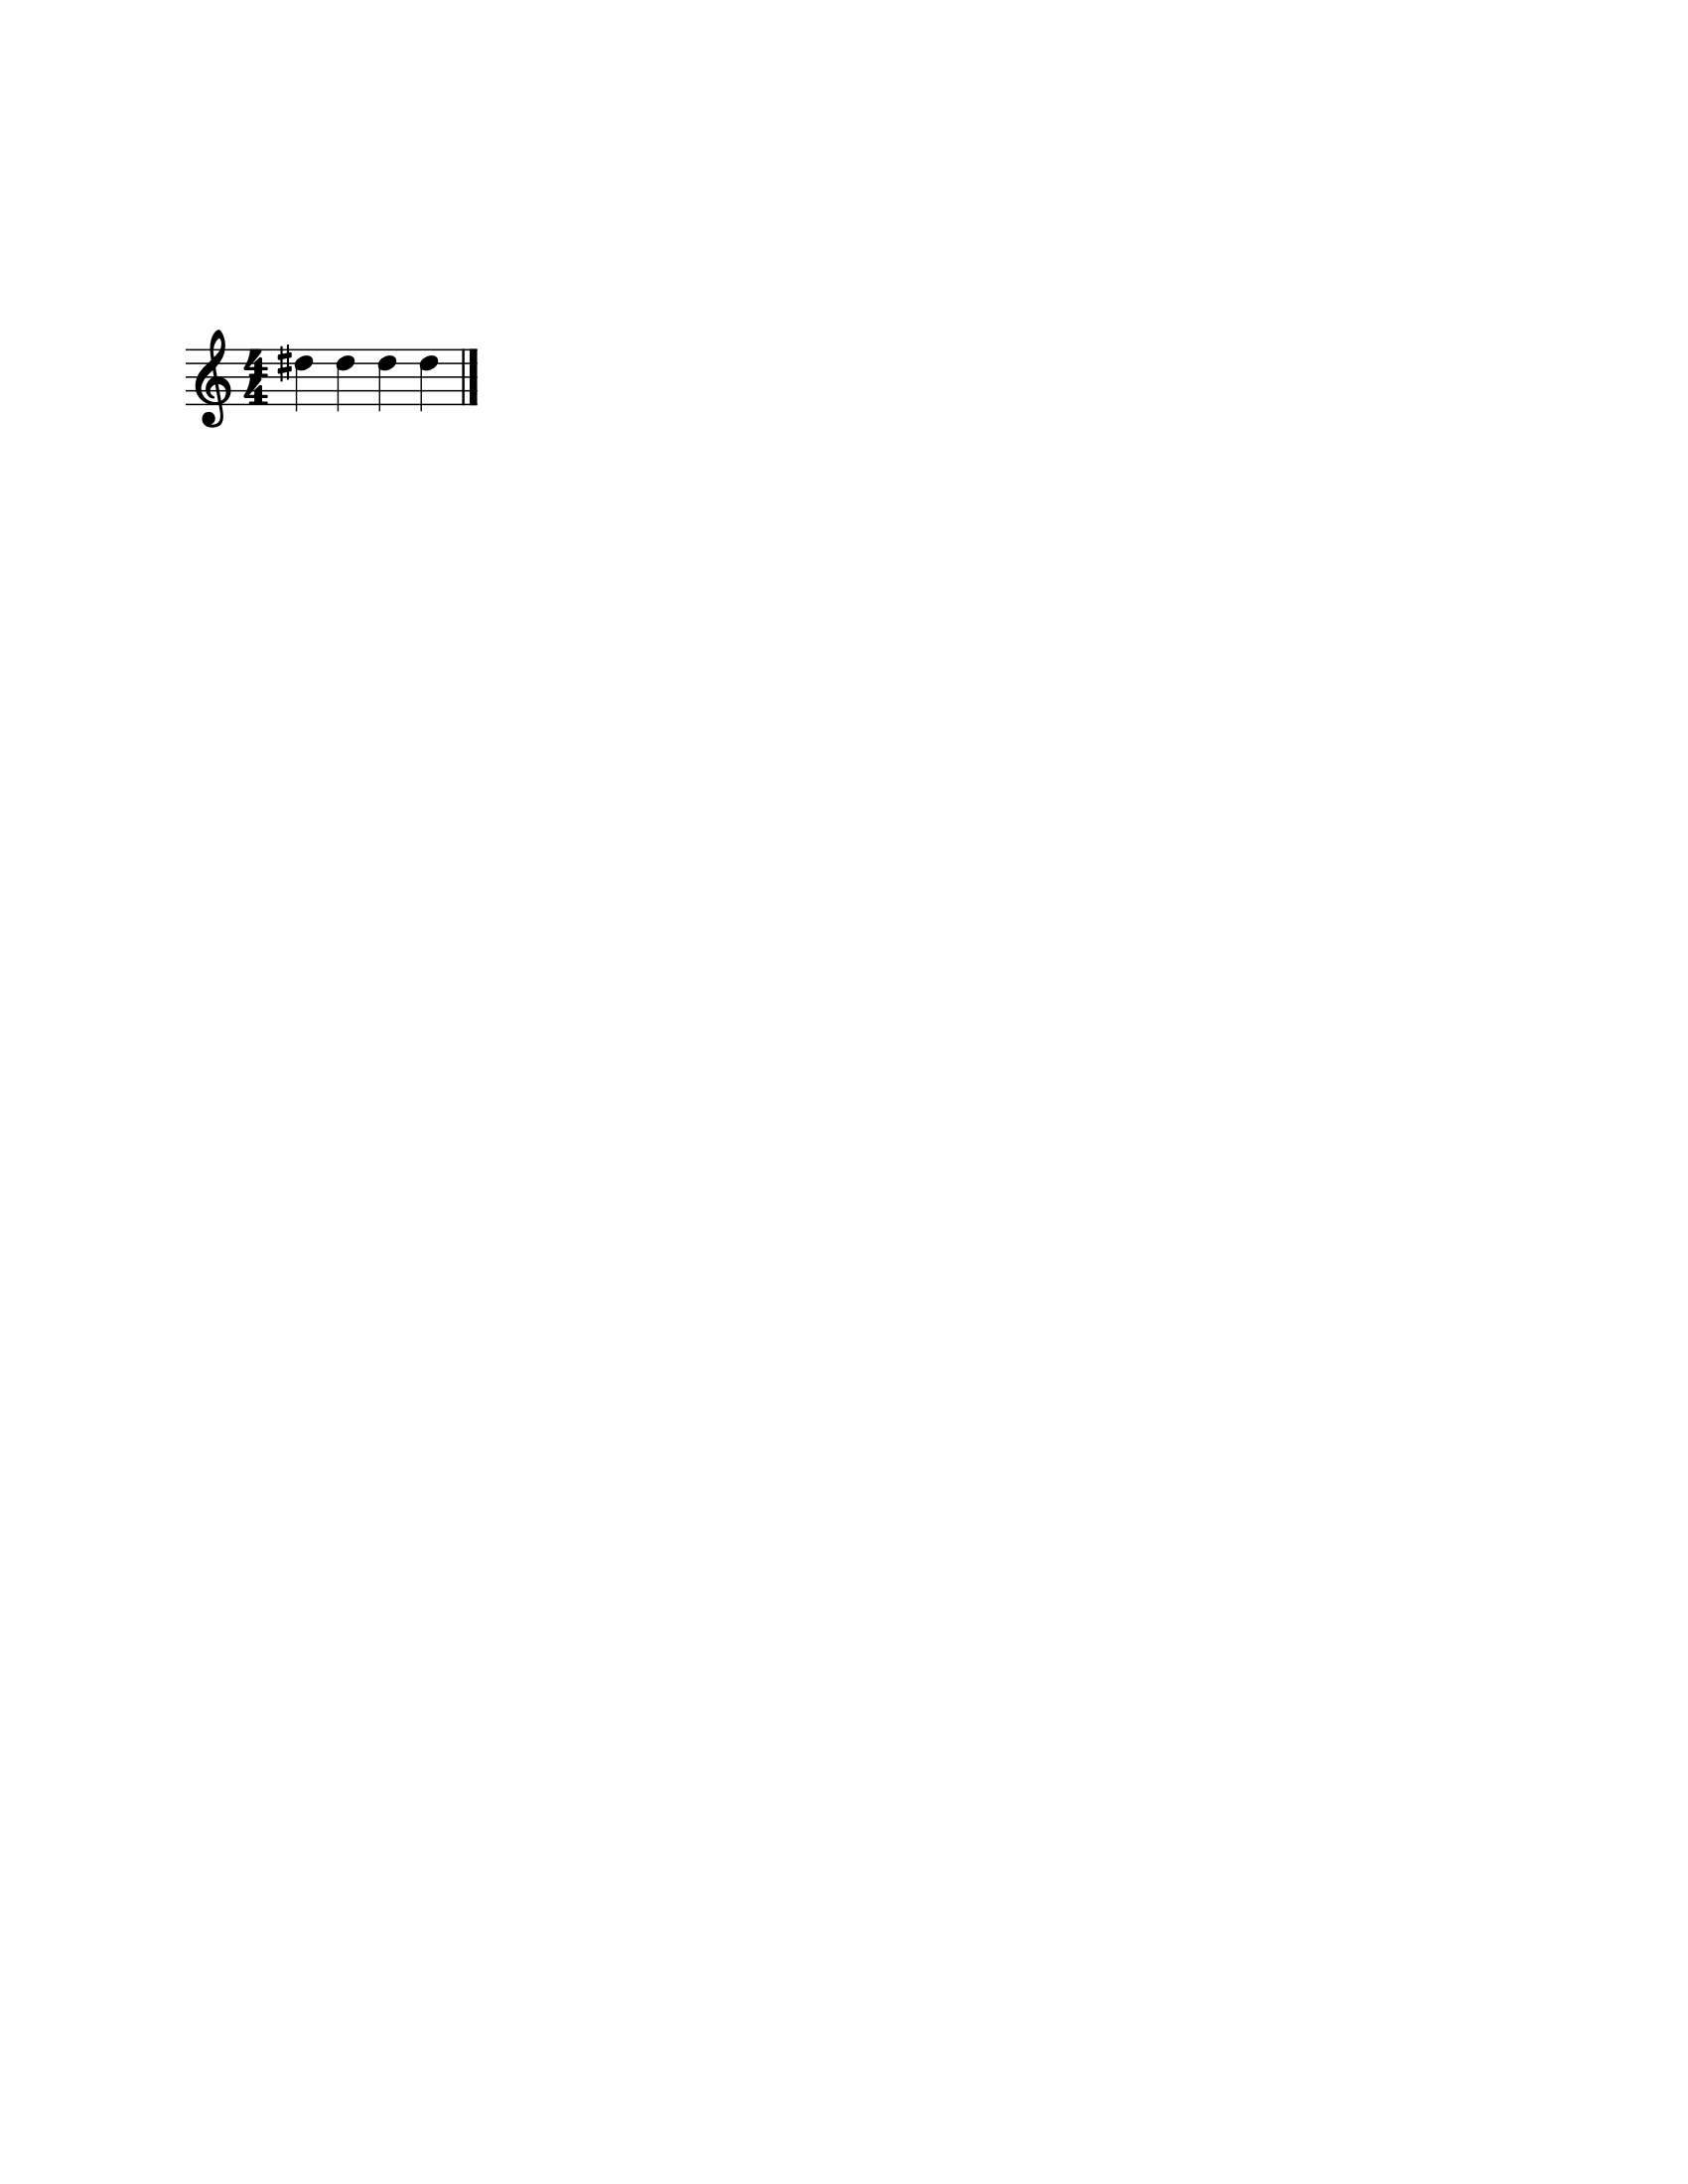

In [221]:
stream2 = stream.Stream()
n3 = note.Note('D#5')  # octave values can be included in creation arguments
stream2.repeatAppend(n3, 4)
stream2.show()

In [224]:
len(stream2)

4

In [225]:
stream2.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.note.Note D#>
{2.0} <music21.note.Note D#>
{3.0} <music21.note.Note D#>


#### Accessing Streams

We can also dive deeper into streams. Let’s get the step of each Note using the for thisNote in ...: command. But now we’ll use stream1 instead of noteList:

In [227]:
for thisNote in stream1:
    print(thisNote.name)

C
F#
B-


In [228]:
stream1[-1].nameWithOctave

'B-2'

While full list-like functionality of the Stream isn’t there, some additional methods familiar to users of Python lists are also available. The Stream index() method can be used to get the first-encountered index of a supplied object.

In [230]:
str1Note3Index = stream1.index(note3)
str1Note3Index

2

Given an index, an element from the Stream can be removed with the pop() method.

In [237]:
stream1.pop(str1Note3Index)

<music21.note.Note B->

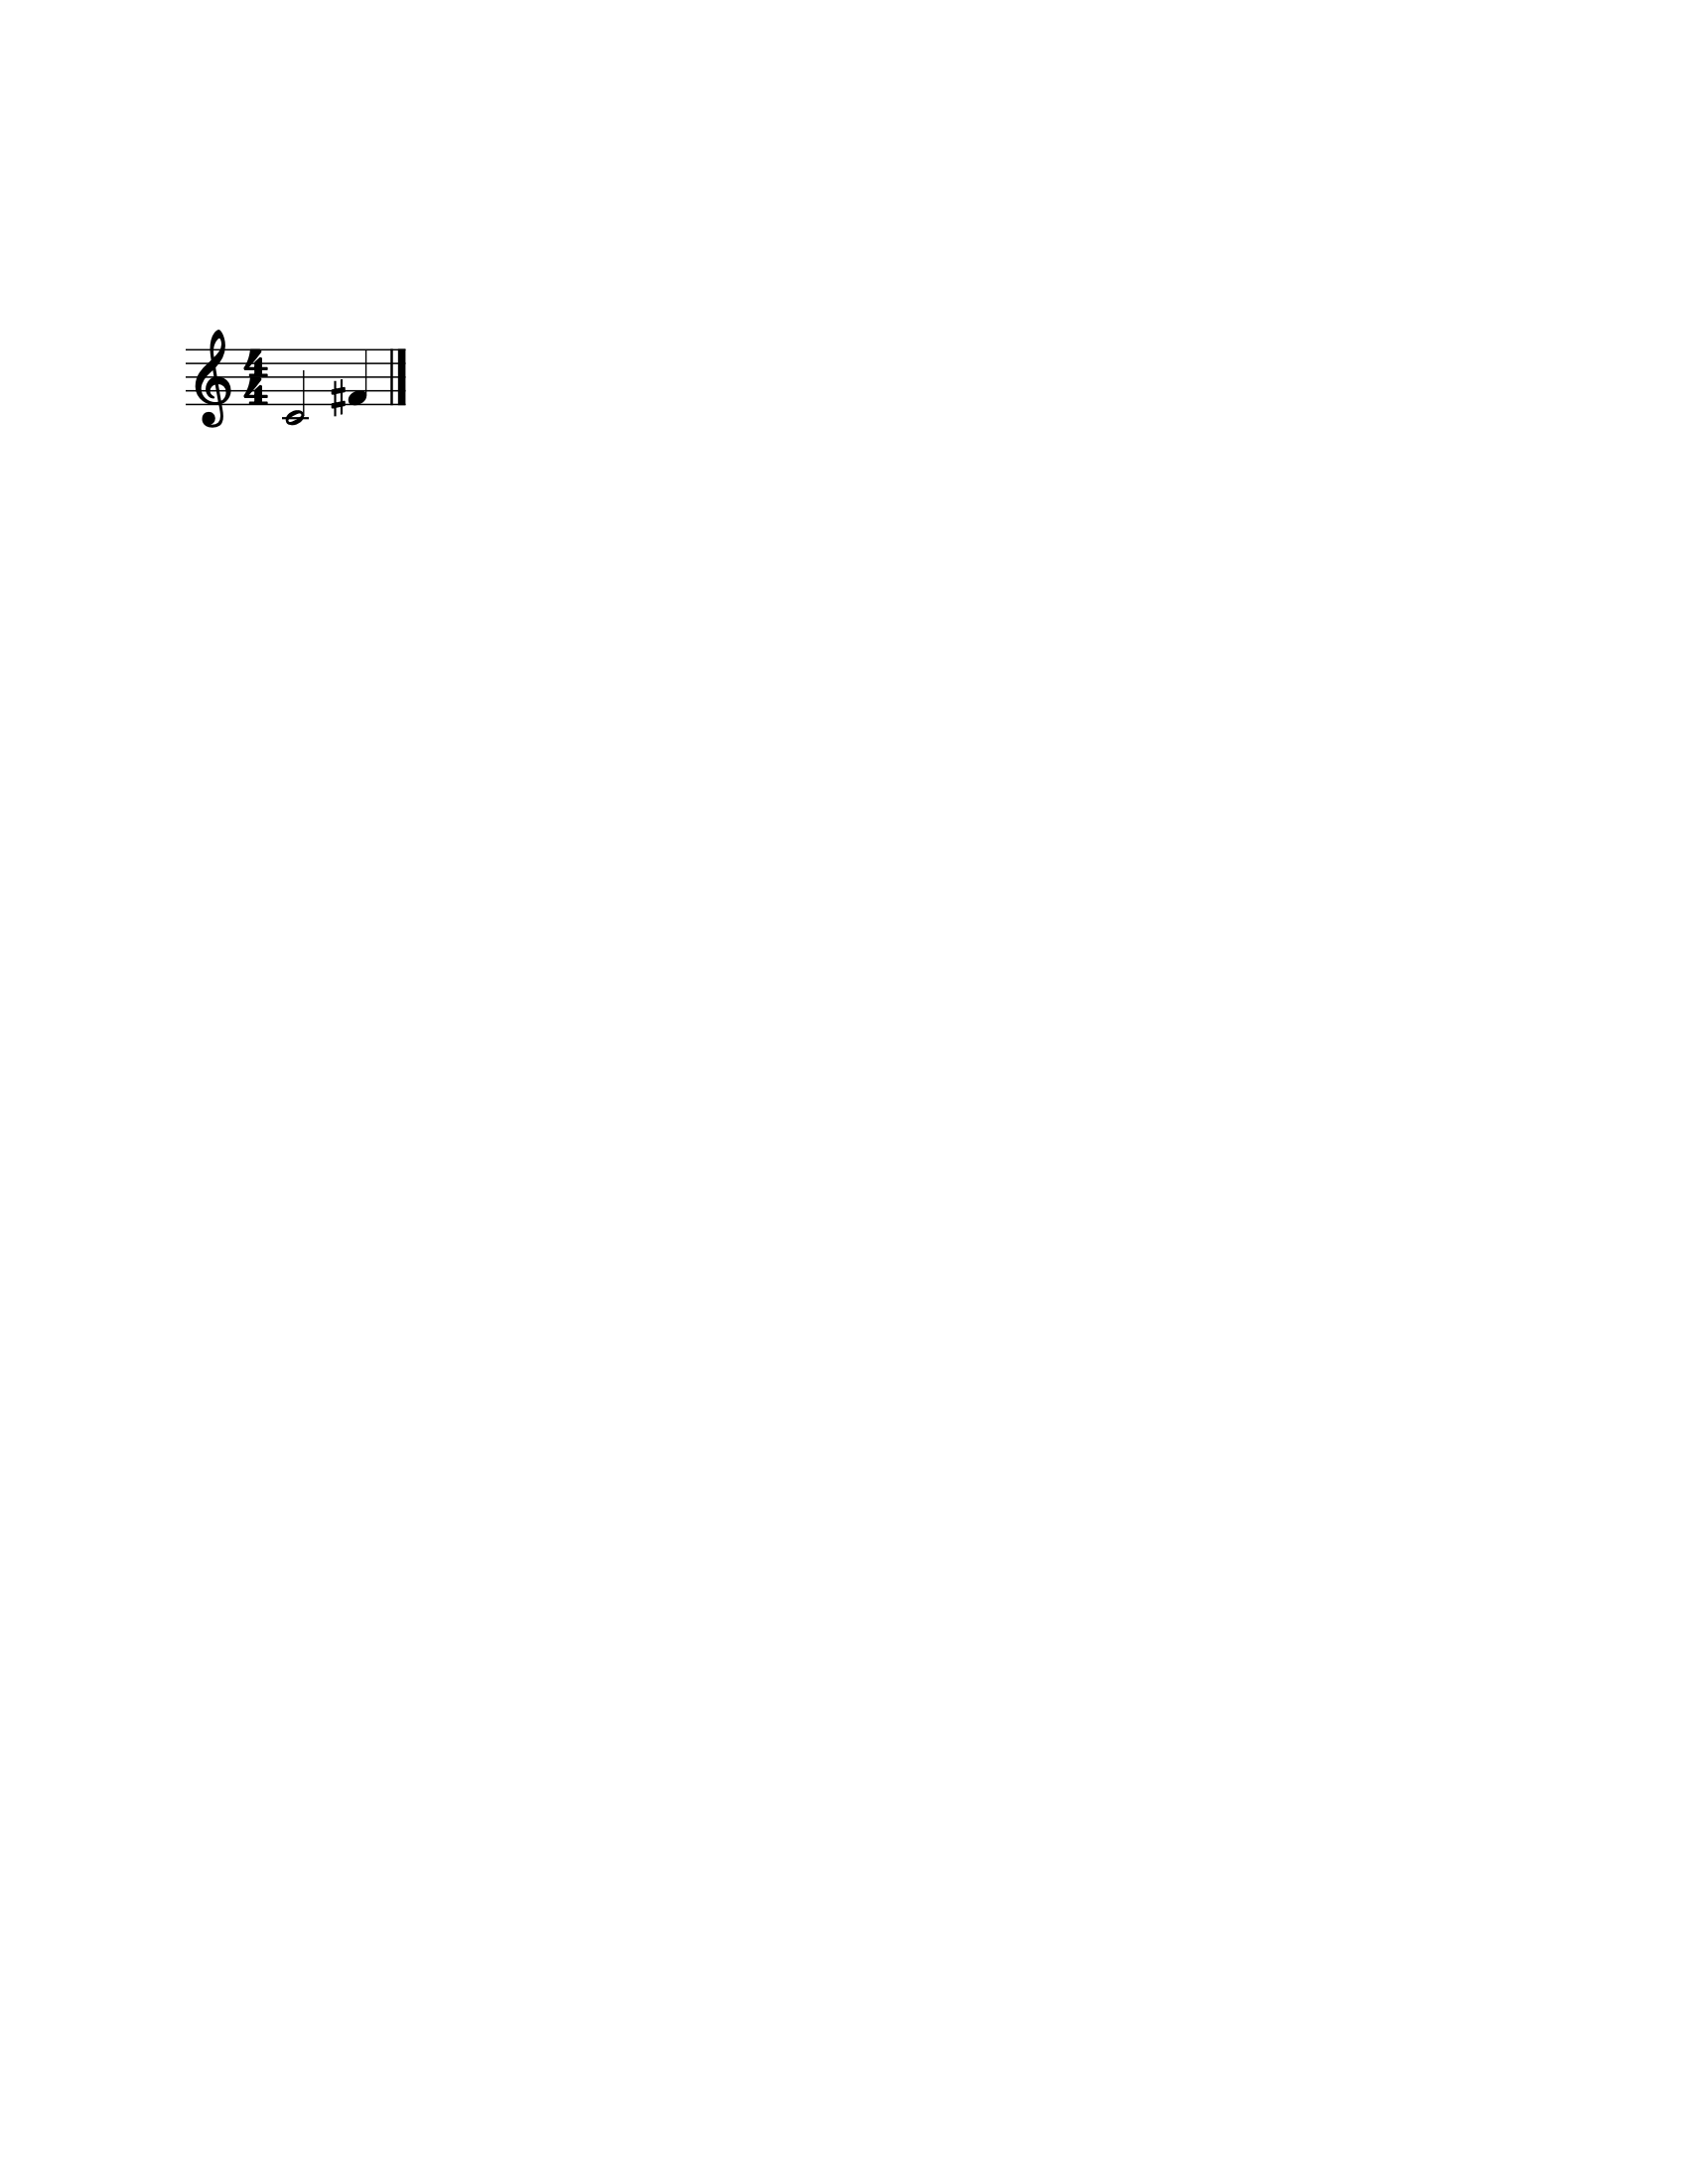

In [238]:
stream1.show()

Since we removed note3 from stream1 with the the pop() method, let’s add note3 back into stream1 so that we can continue with the examples below using stream1 as we originally created it.

In [239]:
stream1.append(note3)

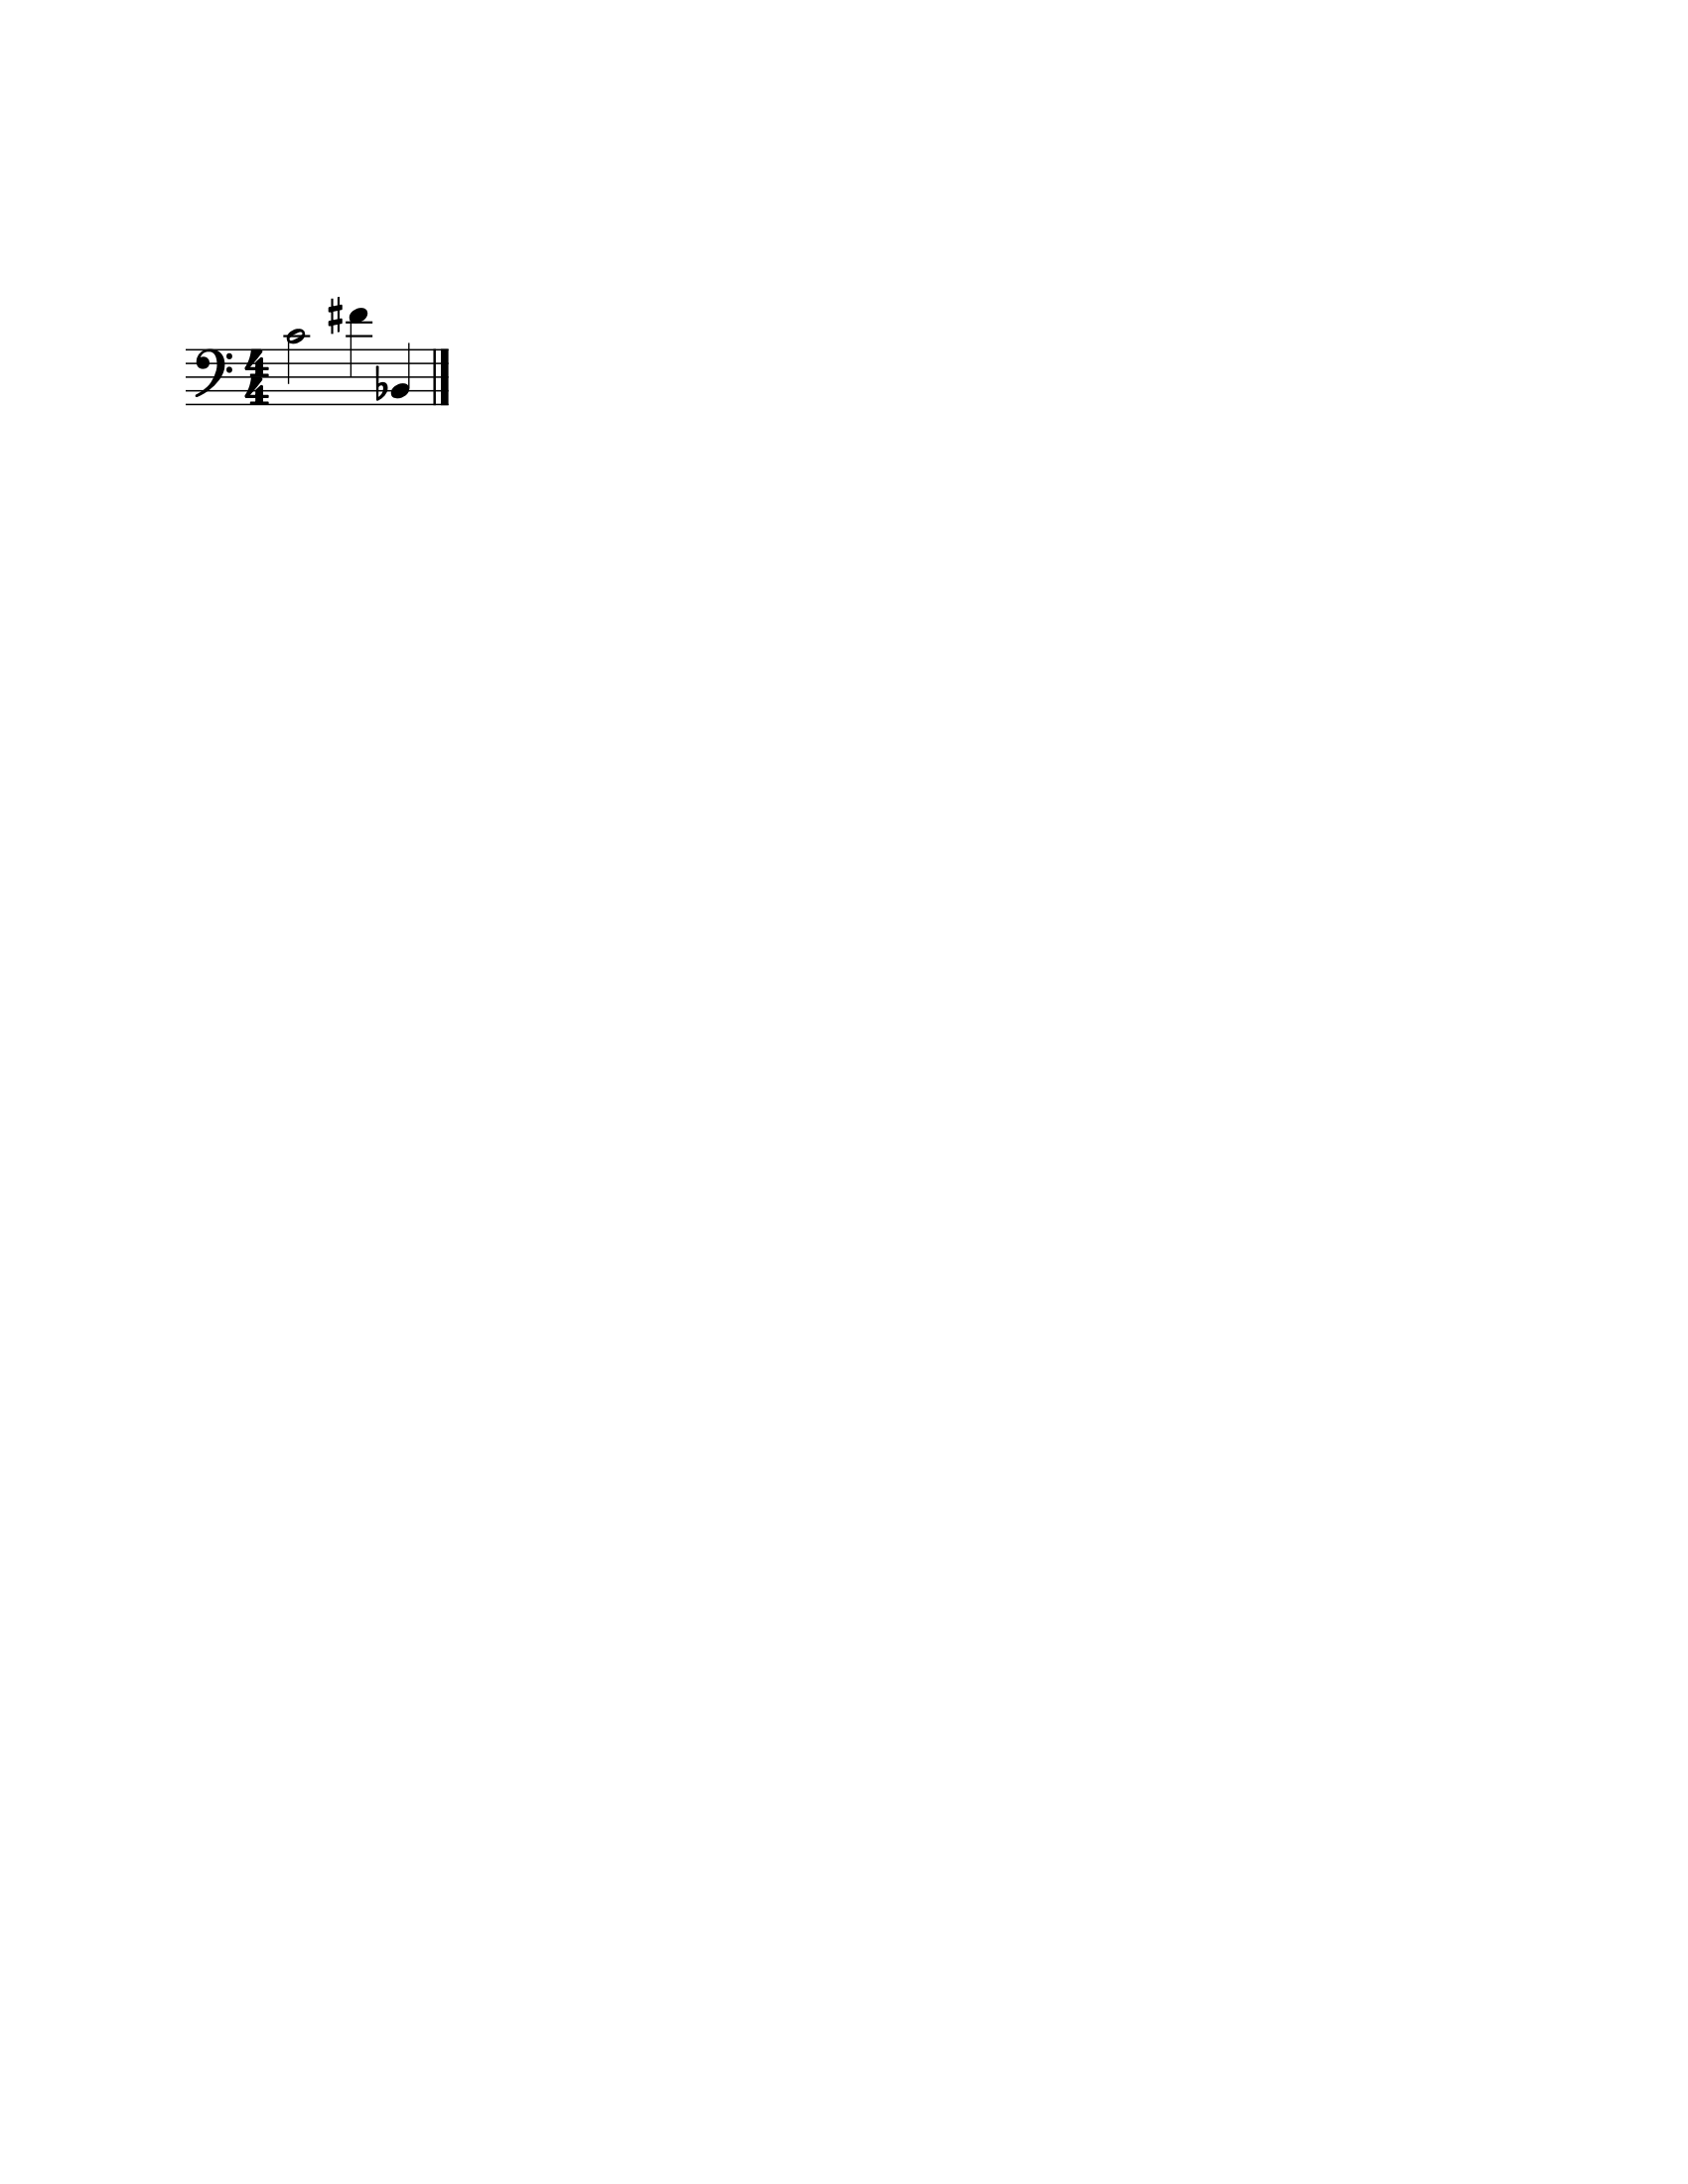

In [240]:
stream1.show()

#### Separating out elements by class with .getElementsByClass()¶

We can also gather elements based on the class (object type) of the element, by offset range, or by specific identifiers attached to the element. Gathering elements from a Stream based on the class of the element provides a way to filter the Stream for desired types of objects. The getElementsByClass() method iterates over a Stream of elements that are instances or subclasses of the provided classes. The example below gathers all Note objects and then all Rest objects. The easiest way to do this is to use for loops with .getElementsByClass():

In [241]:
for thisNote in stream1.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [243]:
for thisNote in stream1.getElementsByClass("Note"):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


It is also possible to pass in a list of classes or strings of class names to .getElementsByClass() which will return anything that matches any of the classes. Notice the [] marks in the next call, indicating that we are creating a list to pass to .getElementsByClass():

In [244]:
for thisNote in stream1.getElementsByClass(['Note', 'Rest']):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


Since there are no note.Rest objects, it’s the same as above. Oh well…

music21 has a couple of shortcuts that are equivalent to .getElementsByClass. For instance .notes is equivalent to .getElementsByClass(['Note', 'Chord']) (we’ll get to chords soon):

In [245]:
for thisNote in stream1.notes:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


In [246]:
for thisNote in stream1.notesAndRests:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


Finally, there’s something slightly different. .pitches begins with a call to .notes, but then returns a list of all the pitches from every Note or Chord in the Stream:

In [247]:
listOut = stream1.pitches
listOut

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch B-2>]

The result of a .getElementsByClass are not technically streams, but you can convert it to a stream with .stream() and then call .show() on it:

In [256]:
streamIterator = stream1.getElementsByClass(note.Note)
sOut = streamIterator.stream()
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


#### Separating out elements by offset with .getElementsByOffset()

The getElementsByOffset() method returns a Stream of all elements that fall either at a single offset or within a range of two offsets provided as an argument. In both cases a Stream is returned.

In [257]:
sOut = stream1.getElementsByOffset(3)
len(sOut)

1

In [261]:
sOut[0]

<music21.note.Note B->

Like with .getElementsByClass() if you want a Stream from .getElementsByOffset(), add .stream() to the end of it.

In [262]:
sOut = stream1.getElementsByOffset(2, 3).stream()
sOut.show('text')

{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


We will do more with .getElementsByOffset() later when we also talk about getElementAtOrBefore() and getElementAfterElement()

#### More Stream features

Okay, so far we’ve seen that Streams can do the same things as lists, but can they do more? Let’s call the analyze method on stream to get the ambitus (that is, the range from the lowest note to the highest note) of the Notes in the Stream:

In [263]:
stream1.analyze('ambitus')

<music21.interval.Interval A12>

Let’s take a second to check this. Our lowest note is note3 (B-flat in octave 2) and our highest note is note2 (F-sharp in octave 4). From B-flat to the F-sharp above it, is an augmented fifth. An augmented fifth plus an octave is an augmented twelfth. So we’re doing well so far. (We’ll get to other things we can analyze in chapter 18 and we’ll see what an Interval object can do in chapter 15).

As we mentioned earlier, when placed in a Stream, Notes and other elements also have an offset (stored in .offset) that describes their position from the beginning of the stream. These offset values are also given in quarter-lengths (QLs).

In [264]:
note1.offset

0.0

note2’s offset will be 2.0, since note1 is a half note, worth two quarter notes:

In [265]:
note2.offset

2.0

And note3, which follows the quarter note note2 will be at offset 3.0:

In [266]:
note3.offset

3.0

(If we made note2 an eighth note, then note3’s offset would be the floating point [decimal] value 2.5. But we didn’t.) So now when we’re looping we can see the offset of each note. Let’s print the note’s offset followed by its name by putting .offset and .name in the same line, separated by a comma:

In [267]:
for thisNote in stream1:
    print(thisNote.offset, thisNote.name)

0.0 C
2.0 F#
3.0 B-


(Digression: It’s probably not too early to learn that a safer form of .offset is .getOffsetBySite(stream1):

In [268]:
note2.offset

2.0

In [269]:
note2.getOffsetBySite(stream1)

2.0

What’s the difference?

Remember how I said that .offset refers to the number of quarter notes that the Note is from the front of a Stream? 

Well, eventually you may put the same Note in different places in multiple Streams, so the .getOffsetBySite(X) command is a safer way that specifies exactly which Stream we are talking about. End of digression…)

As a final note about offsets, the lowestOffset property returns the minimum of all offsets for all elements on the Stream.

So, what else can we do with Streams? Like Note objects, we can show() them in a couple of different ways. Let’s hear these three Notes as a MIDI file: